# **Data Understanding**

MovieLens 20M adalah dataset populer yang digunakan untuk riset sistem rekomendasi. Dataset ini dikelola oleh GroupLens Research Project di University of Minnesota.

Link : https://www.kaggle.com/datasets/grouplens/movielens-20m-dataset

- Ukuran Data: Dataset ini mengandung sekitar 20 juta rating dan 465.564 aplikasi tag.
- Pengguna dan Film: Meliputi interaksi dari 138.493 pengguna pada 27.278 film.
- Periode Waktu: Data ini dibuat oleh pengguna antara 9 Januari 1995 hingga 31 Maret 2015. Dataset ini sendiri dihasilkan pada 17 Oktober 2016 (dengan pembaruan tautan dan penambahan file genome).
- Kriteria Pengguna: Setiap pengguna yang disertakan dalam dataset ini telah memberikan rating setidaknya pada 20 film, memastikan adanya riwayat interaksi yang cukup.

Dataset MovieLens 20M memiliki beberapa file, di antaranya:

**1. Informasi Film (Item/Produk)**

Dalam dataset MovieLens, file movies.csv berfungsi sebagai pusat informasi utama mengenai film. File ini berisi data seperti movieId, title, dan genres. Data ini yang menyimpan informasi inti dari setiap Genre pada film, seperti “Action”, “Comedy”, dan “Drama”.

**2. Fitur Konten Film (Konten Item)**

Untuk mendukung sistem rekomendasi berbasis konten, file tags.csv menyediakan tag-tag yang diberikan oleh pengguna pada film tertentu, misalnya “time travel” atau “mind-bending”. Dalam MovieLens, genre dari movies.csv juga dapat diperlakukan sebagai fitur konten penting.

**3. Profil Pengguna (User/Consumer)**

Dataset MovieLens 20M tidak menyediakan informasi demografis atau preferensi eksplisit pengguna. Namun, preferensi ini dapat diturunkan secara tidak langsung melalui data rating pada file ratings.csv, dengan menganalisis pola perilaku menonton pengguna.

**4. Interaksi Pengguna dan Film (User-Item-Rating)**

File ratings.csv merupakan inti dari sistem rekomendasi dalam dataset ini. File ini mencatat interaksi pengguna dengan film, dalam bentuk rating numerik dari 0.5 hingga 5.0. Data inilah yang digunakan dalam pendekatan collaborative filtering untuk memahami hubungan antar pengguna dan film berdasarkan kesamaan pola rating.

**5. Informasi Tambahan**

Selain itu, file links.csv dalam MovieLens berisi relasi antara movieId dengan ID dari basis data film lain seperti IMDb dan TMDb. File ini berguna untuk integrasi eksternal atau penambahan metadata tambahan jika dibutuhkan.

**Fitur Dataset:**
1. **`movies.csv`** – Metadata Item (Film)
File ini berisi informasi dasar tentang film yang digunakan sebagai item dalam sistem rekomendasi.
    - `movieId` (int): ID unik untuk setiap film
    - `title` (string): Judul lengkap film, termasuk tahun rilis
    - `genres` (string): Kategori genre film, dipisahkan oleh simbol `|` (contoh: `Action|Comedy|Drama`)
     File ini penting dalam pendekatan *content-based filtering* karena genre digunakan sebagai fitur konten untuk menghitung kemiripan antar film.

2. **`ratings.csv`** – User-Item Interaction (Feedback Implisit/Eksplisit)
File ini menyimpan informasi interaksi antara pengguna dan film berupa rating numerik.
    - `userId` (int): ID unik pengguna
    - `movieId` (int): ID film yang dirating
    - `rating` (float): Skor rating (0.5 – 5.0 dalam kelipatan 0.5), mencerminkan preferensi eksplisit
    - `timestamp` (int): Waktu (format UNIX epoch) saat rating diberikan
     File ini merupakan inti dari pendekatan *collaborative filtering*, yang menggunakan pola rating untuk membangun model rekomendasi.


3. **`tags.csv`** – User-Generated Content (Fitur Tambahan Item)
File ini menyimpan tag atau label deskriptif yang diberikan pengguna kepada film, menambahkan informasi semantik tambahan.
    - `userId` (int): ID pengguna
    - `movieId` (int): ID film yang diberi tag
    - `tag` (string): Kata atau frasa yang diberikan pengguna, bisa berupa genre, tema, atau nama tokoh (misal: sci-fi, based on a book, christopher nolan)
    - `timestamp` (int): Waktu tag diberikan
      Informasi dari file ini dapat digunakan untuk memperkaya fitur konten dalam content-based filtering dan untuk analisis preferensi tematik.

4. **`links.csv`** – Eksternal Identifier Mapping
File ini menyediakan koneksi antara ID film dalam MovieLens dengan ID eksternal dari basis data lain seperti IMDb dan TMDb.
    - `movieId` (int): ID film dalam MovieLens
    - `imdbId` (int): ID film dalam IMDb
    - `tmdbId (float): ID film dalam The Movie Database (TMDb); sebagian nilai dapat hilang (NaN)
      File ini berguna jika pengguna ingin menambahkan metadata tambahan dari sumber luar, seperti poster film, sinopsis, atau rating global dari situs eksternal.

## **Import Library**

In [1]:
# Untuk manipulasi data dan analisis
import pandas as pd
import numpy as np

# Untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk pre-pemrosesan data
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Untuk membangun model sistem rekomendasi
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

# Untuk model yang lebih canggih (jika diperlukan)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# Untuk evaluasi model (Contoh: RMSE, precision, recall)
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import precision_score, recall_score

# Untuk memuat dan menyimpan model
import joblib

# Untuk interaksi dengan Google Cloud Storage
from google.colab import files

# Untuk menangani peringatan (opsional)
import warnings
warnings.filterwarnings('ignore')

### **Insight:**

Dalam proyek sistem rekomendasi ini, berbagai library diimpor untuk mendukung proses pengolahan data, pemodelan, dan evaluasi. Untuk manipulasi dan analisis data tabular, digunakan `pandas` dan `numpy`, sedangkan visualisasi eksploratif dilakukan dengan `matplotlib.pyplot` dan `seaborn`. Proses prapemrosesan mencakup normalisasi data dengan `MinMaxScaler`, encoding dengan `LabelEncoder`, serta representasi teks genre film menggunakan `TfidfVectorizer`. Pada pendekatan Content-Based Filtering, kemiripan antar film dihitung menggunakan `cosine_similarity` dari `sklearn`, setelah representasi genre dibentuk dengan TF-IDF.

Sementara itu, pendekatan Collaborative Filtering dikembangkan menggunakan deep learning berbasis `tensorflow.keras`, khususnya dengan model `RecommenderNet` yang memanfaatkan layer embedding untuk merepresentasikan pengguna dan film. Model ini dioptimasi menggunakan algoritma `Adam`, dan pelatihan dikontrol dengan `EarlyStopping`. Evaluasi model dilakukan dengan metrik regresi seperti `mean_absolute_error` dan `mean_squared_error`, serta metrik top-N rekomendasi seperti Precision\@K. Untuk penyimpanan model atau objek besar seperti TF-IDF vectorizer, digunakan `joblib`, sedangkan `google.colab.files` dipakai untuk mendukung interaksi file di Google Colab. Seluruh kombinasi pustaka ini menunjukkan bahwa sistem dibangun secara komprehensif dengan pendekatan modern berbasis neural network dan pemrosesan teks.


## **Import Dataset**

In [2]:
!wget https://files.grouplens.org/datasets/movielens/ml-20m.zip

--2025-06-03 09:51:16--  https://files.grouplens.org/datasets/movielens/ml-20m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 198702078 (189M) [application/zip]
Saving to: ‘ml-20m.zip’

ml-20m.zip          100%[===================>] 189.50M  17.9MB/s    in 13s     

2025-06-03 09:51:30 (14.8 MB/s) - ‘ml-20m.zip’ saved [198702078/198702078]



### **Insight:**
- Pengunduhan Dataset MovieLens: Perintah !wget https://files.grouplens.org/datasets/movielens/ml-20m.zip menunjukkan bahwa sebuah dataset bernama "ml-20m.zip" sedang diunduh dari situs files.grouplens.org. Ini kemungkinan besar adalah dataset MovieLens 20M, yang sering digunakan untuk penelitian dan pengembangan sistem rekomendasi.
- Proses Pengunduhan Berhasil: Output dari perintah wget menunjukkan bahwa pengunduhan berhasil. Server merespons dengan 200 OK, dan file sebesar 189 MB (198702078 (189M)) berhasil diunduh dan disimpan sebagai ml-20m.zip.1.

In [3]:
!unzip ml-20m.zip

Archive:  ml-20m.zip
   creating: ml-20m/
  inflating: ml-20m/genome-scores.csv  
  inflating: ml-20m/genome-tags.csv  
  inflating: ml-20m/links.csv        
  inflating: ml-20m/movies.csv       
  inflating: ml-20m/ratings.csv      
  inflating: ml-20m/README.txt       
  inflating: ml-20m/tags.csv         


### **Insight:**
- Ekstraksi Dataset MovieLens: Perintah !unzip ml-20m.zip menunjukkan bahwa file arsip ml-20m.zip (yang sebelumnya diunduh) sedang diekstrak.
- Isi Dataset MovieLens 20M: Proses unzip menunjukkan bahwa dataset MovieLens 20M ini berisi beberapa file .csv dan satu file .txt. File-file ini kemungkinan besar adalah:
  - ml-20m/genome-scores.csv: Berisi skor relevansi untuk fitur-fitur genome.
  - ml-20m/genome-tags.csv: Berisi tag-tag yang terkait dengan fitur genome.
  - ml-20m/links.csv: Berisi tautan antara ID MovieLens dengan ID dari sumber lain (misalnya, IMDb, TMDB).
  - ml-20m/movies.csv: Berisi informasi tentang film, seperti ID film, judul, dan genre.
  - ml-20m/ratings.csv: Ini adalah file yang paling penting, berisi rating pengguna terhadap film (ID pengguna, ID film, rating, timestamp).
  - ml-20m/README.txt: File teks yang menjelaskan struktur dataset dan informasi tambahan.
  - ml-20m/tags.csv: Berisi tag yang diberikan pengguna ke film.
- Konfirmasi Dataset Siap Digunakan: Setelah proses unzip ini selesai, semua data yang diperlukan untuk menganalisis atau membangun sistem rekomendasi dari dataset MovieLens 20M akan tersedia dalam format CSV yang mudah diakses.

In [4]:
# Load Dataset MovieLens 20M
movies = pd.read_csv('ml-20m/movies.csv')
ratings = pd.read_csv('ml-20m/ratings.csv')
tags = pd.read_csv('ml-20m/tags.csv')
links = pd.read_csv('ml-20m/links.csv')

# Data Understanding
print('Jumlah film unik: ', len(movies.movieId.unique()))
print('Jumlah pengguna unik: ', len(ratings.userId.unique()))
print('Jumlah interaksi rating pengguna: ', len(ratings))
print('Jumlah tag unik: ', len(tags.tag.unique()))
print('Jumlah film yang diberi tag: ', len(tags.movieId.unique()))
print('Jumlah koneksi ke IMDb/TMDb: ', len(links.movieId.unique()))

Jumlah film unik:  27278
Jumlah pengguna unik:  138493
Jumlah interaksi rating pengguna:  20000263
Jumlah tag unik:  38644
Jumlah film yang diberi tag:  19545
Jumlah koneksi ke IMDb/TMDb:  27278


### **Insight:**
1. Pemuatan Dataset MovieLens 20M dengan Pandas: Kode ini menunjukkan pemuatan beberapa file CSV dari dataset MovieLens 20M ke dalam DataFrame Pandas. Ini adalah langkah awal yang umum dalam analisis data dan machine learning menggunakan Python. File-file yang dimuat adalah:
  - movies.csv
  - ratings.csv
  - tags.csv
  - links.csv

  Ini menunjukkan bahwa semua komponen utama dari dataset akan digunakan.

2. Pemahaman Data Awal (Data Understanding): Setelah memuat data, kode ini melakukan eksplorasi dasar untuk memahami karakteristik dataset. Ini adalah praktik terbaik yang sangat penting dalam setiap proyek data science. Metrik yang diekstrak adalah:

  - Jumlah film unik: len(movies.movieId.unique())
  - Jumlah pengguna unik: len(ratings.userId.unique())
  - Jumlah interaksi rating pengguna: len(ratings) (ini adalah jumlah baris dalam DataFrame ratings, yang merepresentasikan setiap rating yang diberikan)
  - Jumlah tag unik: len(tags.tag.unique())
  - Jumlah film yang diberi tag: len(tags.movieId.unique())
  - Jumlah koneksi ke IMDb/TMDB: len(links.movieId.unique())

3. Statistik Dataset MovieLens 20M yang Terkonfirmasi: Output dari kode ini memberikan angka-angka konkret tentang skala dataset:
  - Jumlah film unik: 27.278 film
  - Jumlah pengguna unik: 138.493 pengguna
  - Jumlah interaksi rating pengguna: 20.000.263 rating (ini mengkonfirmasi dataset MovieLens 20M, yang memang memiliki sekitar 20 juta rating)
  - Jumlah tag unik: 38.644 tag unik
  - Jumlah film yang diberi tag: 19.545 film (ini berarti tidak semua film memiliki tag)
  - Jumlah koneksi ke IMDb/TMDB: 27.278 film (ini menunjukkan bahwa semua film yang ada dalam dataset movies juga memiliki koneksi ke IMDb/TMDB, yang sangat berguna untuk mendapatkan informasi tambahan atau menggabungkan dengan dataset eksternal).

4. Kesiapan untuk Analisis Lanjutan/Model Rekomendasi: Angka-angka ini menunjukkan bahwa dataset MovieLens 20M adalah dataset yang besar dan kaya, siap untuk digunakan dalam membangun dan mengevaluasi sistem rekomendasi, melakukan analisis pola preferensi pengguna, atau penelitian terkait film dan data pengguna. Keberadaan informasi tag dan link juga membuka peluang untuk fitur rekayasa yang lebih kompleks.

# **Univariate Exploratory Data Analysis**

## Movies Variabel

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


### **Insight:**
Perintah movies.info() pada DataFrame movies menunjukkan struktur dan tipe data dari dataset film. Terlihat ada 27.278 entri (film) dengan 3 kolom: movieId (integer), title (object/string), dan genres (object/string). Semua kolom ini non-null, yang berarti tidak ada nilai yang hilang, memastikan kualitas data yang baik untuk analisis. Penggunaan memori sekitar 639.5+ KB menunjukkan bahwa dataset ini relatif kecil dan mudah diolah.

In [6]:
unique_genres = set()
for genre_list in movies['genres']:
    unique_genres.update(genre_list.split('|'))

print("Jumlah genre unik:", len(unique_genres))
print("Genre yang tersedia:", unique_genres)

Jumlah genre unik: 20
Genre yang tersedia: {'(no genres listed)', 'Fantasy', 'Drama', 'Romance', 'Western', 'Sci-Fi', 'Crime', 'War', 'IMAX', 'Animation', 'Adventure', 'Horror', 'Musical', 'Children', 'Mystery', 'Action', 'Film-Noir', 'Comedy', 'Thriller', 'Documentary'}


### **Insight:**
Kode tersebut berhasil mengekstrak dan mengidentifikasi 20 genre film unik dari dataset MovieLens. Ini termasuk genre umum seperti 'Comedy', 'Drama', 'Action', hingga yang spesifik seperti 'Film-Noir' dan 'IMAX', serta kategori '(no genres listed)', menunjukkan dataset memiliki cakupan genre yang luas untuk analisis rekomendasi.

## Ratings Variabel

In [7]:
ratings.info()
ratings.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 610.4 MB


,userId,movieId,rating,timestamp
count,2.000026e+07,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00,1.100918e+09
std,4.003863e+04,1.978948e+04,1.051989e+00,1.621694e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,3.439500e+04,9.020000e+02,3.000000e+00,9.667977e+08
50%,6.914100e+04,2.167000e+03,3.500000e+00,1.103556e+09
75%,1.036370e+05,4.770000e+03,4.000000e+00,1.225642e+09
max,1.384930e+05,1.312620e+05,5.000000e+00,1.427784e+09


### **Insight:**
- Ukuran Data: Dataset memiliki 20 juta entri (baris), menunjukkan dataset yang sangat besar dan komprehensif untuk analisis rating.
- Kolom dan Tipe Data:
  - userId (int64): ID pengguna.
  - movieId (int64): ID film.
  - rating (float64): Nilai rating, menunjukkan rating bisa berupa desimal.
  - timestamp (int64): Waktu rating diberikan.
- Ringkasan Statistik (Variabel Numerik):
  - userId: Rentang ID pengguna sangat luas (dari 1 hingga sekitar 138 ribu), dengan rata-rata sekitar 69 ribu. Standar deviasi yang besar (sekitar 40 ribu) menunjukkan variasi yang signifikan antar pengguna.
  - movieId: Rentang ID film juga luas (dari 1 hingga sekitar 131 ribu), dengan rata-rata sekitar 90 ribu. Ini menunjukkan dataset mencakup banyak film yang berbeda.
  - rating:
    - Rata-rata rating adalah sekitar 3.52.
    - Rating berkisar dari 0.5 hingga 5.0.
    - Standar deviasi rating relatif kecil (sekitar 1.05), menunjukkan bahwa sebagian besar rating cenderung mengumpul di sekitar rata-rata.
    - Median (50%) rating adalah 3.5, yang hampir sama dengan rata-rata, menunjukkan distribusi rating yang cukup simetris.
  - timestamp: Nilai timestamp yang besar menunjukkan bahwa ini adalah representasi waktu dalam detik atau milidetik sejak epoch, dan perlu diubah ke format tanggal-waktu yang dapat dibaca untuk analisis lebih lanjut.
- Penggunaan Memori: Dataset menggunakan sekitar 610.4 MB memori, yang wajar mengingat ukurannya yang besar.

In [8]:
print('Jumlah userID:', ratings['userId'].nunique())
print('Jumlah movieID:', ratings['movieId'].nunique())
print('Jumlah data rating:', len(ratings))

Jumlah userID: 138493
Jumlah movieID: 26744
Jumlah data rating: 20000263


### **Insight:**
Kode tersebut menghitung dan menampilkan jumlah unik userID, jumlah unik movieID, dan total jumlah data rating dalam dataset.

- Jumlah unik userID: Ada 138.493 pengguna yang berbeda dalam dataset.
- Jumlah unik movieID: Ada 26.744 film yang berbeda dalam dataset.
- Jumlah data rating: Terdapat total 20.000.263 entri rating.

Ini menunjukkan bahwa dataset ini adalah kumpulan data rating yang sangat besar dan beragam, melibatkan banyak pengguna dan film.

## Tags Variable

In [9]:
tags.info()
tags.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465564 entries, 0 to 465563
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   userId     465564 non-null  int64 
 1   movieId    465564 non-null  int64 
 2   tag        465548 non-null  object
 3   timestamp  465564 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 14.2+ MB


,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


### **Insight:**
- Ukuran Data: Dataset "Tags" memiliki 465.564 entri (baris), yang merupakan dataset yang cukup besar untuk analisis.
- Kolom dan Tipe Data:
  - userId (int64): ID pengguna yang memberikan tag. Semua 465.564 entri non-null.
  - movieId (int64): ID film yang diberi tag. Semua 465.564 entri non-null.
  - tag (object): Teks tag itu sendiri. Tipe object menunjukkan bahwa ini adalah string (teks). Semua 465.564 entri non-null.
  - timestamp (int64): Waktu tag diberikan. Semua 465.564 entri non-null.
- Ketersediaan Data: Semua kolom memiliki jumlah entri non-null yang sama dengan total entri, yang berarti tidak ada nilai yang hilang (missing values) dalam dataset ini.
- Contoh Data Awal (.head()):
  - Menunjukkan contoh tag seperti "Mark Waters", "dark hero", "noir thriller". Ini mengindikasikan bahwa tag bisa berupa nama sutradara, genre, atau deskripsi lain yang relevan dengan film.
  - Timestamp terlihat dalam format integer besar, kemungkinan Unix timestamp, yang perlu dikonversi ke format tanggal-waktu yang lebih mudah dibaca untuk analisis temporal.
- Penggunaan Memori: Dataset ini menggunakan sekitar 14.2+ MB memori.
- Dataset "Tags" berisi informasi tag yang diberikan pengguna ke film, lengkap dengan ID pengguna, ID film, tag, dan timestamp. Dataset ini bersih dari nilai yang hilang dan siap untuk analisis seperti analisis teks pada kolom tag atau analisis tren penggunaan tag seiring waktu setelah mengonversi kolom timestamp.

## Links Variable

In [10]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  27278 non-null  int64  
 1   imdbId   27278 non-null  int64  
 2   tmdbId   27026 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 639.5 KB


### **Insight:**
- Ukuran Data: Dataset "Links" memiliki 27.278 entri (baris). Ini adalah dataset yang relatif lebih kecil dibandingkan dengan dataset "Ratings" atau "Tags" sebelumnya.
- Kolom dan Tipe Data:
  - movieId (int64): ID unik untuk film. Semua 27.278 entri non-null.
  - imdbId (int64): ID unik untuk film di IMDb (Internet Movie Database). Semua 27.278 entri non-null.
  - tmdbId (float64): ID unik untuk film di TMDb (The Movie Database). Terdapat 27.026 entri non-null dari total 27.278, menunjukkan adanya nilai yang hilang (missing values) di kolom ini. Tipe data float64 untuk ID ini juga mengindikasikan adanya nilai NaN (Not a Number) untuk missing values.
- Ketersediaan Data:
  - Kolom movieId dan imdbId lengkap (tidak ada nilai yang hilang).
  - Kolom tmdbId memiliki 252 nilai yang hilang (27278 - 27026 = 252). Ini perlu ditangani jika kolom ini akan digunakan dalam analisis atau penggabungan data.
- Penggunaan Memori: Dataset ini menggunakan sekitar 639.5 KB memori, yang sangat efisien.
- Dataset "Links" berfungsi sebagai jembatan untuk menghubungkan movieId internal dengan ID eksternal dari IMDb dan TMDb. Penting untuk dicatat bahwa ada sejumlah kecil nilai tmdbId yang hilang, yang mungkin memerlukan penanganan (misalnya, mengisi dengan nilai default, menghapus baris, atau membiarkannya) tergantung pada tujuan analisis selanjutnya.

# **Visualisasi Data**

In [11]:
# Set tampilan grafik
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

## **Insight:**
Pengaturan visualisasi menggunakan Seaborn dan Matplotlib untuk menyiapkan plot yang akan datang dengan gaya "whitegrid" dan ukuran gambar yang konsisten, menandakan transisi ke tahap eksplorasi atau presentasi data.
- sns.set(style="whitegrid"): Mengatur gaya (style) default untuk plot seaborn menjadi "whitegrid". Gaya ini biasanya menambahkan grid horizontal dan vertikal berwarna putih di belakang plot, yang seringkali membantu dalam membaca nilai pada grafik.
- plt.rcParams['figure.figsize'] = (10, 5): Mengatur ukuran default untuk semua plot matplotlib yang akan dibuat setelahnya. Ukuran yang ditetapkan adalah 10 inci lebar dan 5 inci tinggi. Ini berguna untuk memastikan konsistensi ukuran plot di seluruh notebook atau script, serta memberikan ukuran yang sesuai agar plot terlihat jelas.

## Distribusi Genre Film

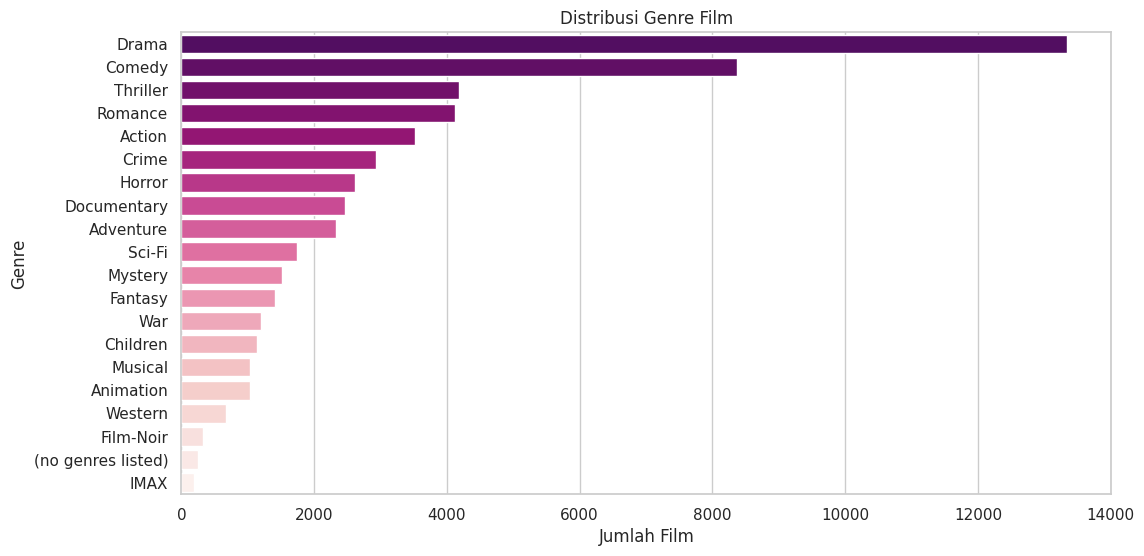

In [12]:
# Pecah kolom genre menjadi satu per baris
genres_expanded = movies['genres'].str.split('|').explode()
genre_counts = genres_expanded.value_counts()

# Visualisasi genre
plt.figure(figsize=(12,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='RdPu_r')
plt.title('Distribusi Genre Film')
plt.xlabel('Jumlah Film')
plt.ylabel('Genre')
plt.show()

### **Insight:**
Dataset movies memiliki kolom genres yang berisi beberapa genre dipisahkan oleh tanda '|'. Kode di atas memecah setiap entri genre menjadi baris terpisah menggunakan .str.split('|').explode(), lalu menghitung frekuensi kemunculan setiap genre. Hasilnya kemudian divisualisasikan dalam bentuk barplot horizontal untuk menampilkan distribusi genre film.

Dari visualisasi, terlihat jelas bahwa "Drama" adalah genre paling dominan dengan lebih dari 13.000 film, diikuti oleh "Comedy" dan "Thriller" dengan jumlah film yang signifikan. Genre-genre lain seperti "Romance", "Action", dan "Crime" juga memiliki jumlah film yang tinggi, menunjukkan popularitasnya. Di sisi lain, genre seperti "IMAX", "Film-Noir", dan "(no genres listed)" memiliki jumlah film yang sangat sedikit, mengindikasikan bahwa ini mungkin adalah kategori yang kurang umum atau khusus dalam dataset ini.

## Distribusi Rating

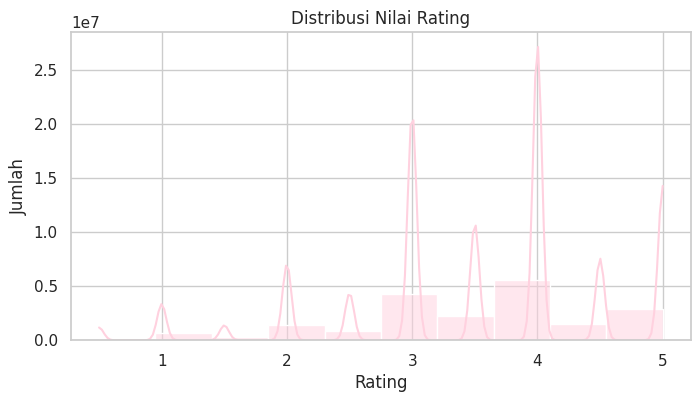

Rata-rata rating: 3.53


In [13]:
# Visualisasi distribusi rating
plt.figure(figsize=(8,4))
sns.histplot(ratings['rating'], bins=10, kde=True, color='xkcd:light pink')
plt.title('Distribusi Nilai Rating')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.show()

# Rata-rata rating
print('Rata-rata rating:', round(ratings['rating'].mean(), 2))

### **Insight:**
Visualisasi ini menunjukkan distribusi nilai rating dalam dataset. Histogram menampilkan frekuensi kemunculan setiap nilai rating. Terlihat jelas adanya puncak-puncak yang signifikan pada rating bulat seperti 3.0, 4.0, dan 5.0, serta pada rating 0.5. Hal ini menunjukkan kecenderungan pengguna untuk memberikan rating dalam angka bulat atau setengah angka.

Selain itu, nilai rata-rata rating adalah 3.53. Ini mengindikasikan bahwa secara keseluruhan, rating yang diberikan cenderung berada di atas nilai tengah skala (misalnya, jika skala 1-5, tengahnya adalah 3), menunjukkan kecenderungan positif dalam pemberian rating film oleh pengguna.

## Distribusi Jumlah Rating per Film

Film dengan rating terbanyak:
      rating_count  movieId                                      title
293          67310      296                        Pulp Fiction (1994)
352          66172      356                        Forrest Gump (1994)
315          63366      318           Shawshank Redemption, The (1994)
587          63299      593           Silence of the Lambs, The (1991)
476          59715      480                       Jurassic Park (1993)
257          54502      260  Star Wars: Episode IV - A New Hope (1977)
108          53769      110                          Braveheart (1995)
583          52244      589          Terminator 2: Judgment Day (1991)
2486         51334     2571                         Matrix, The (1999)
523          50054      527                    Schindler's List (1993)


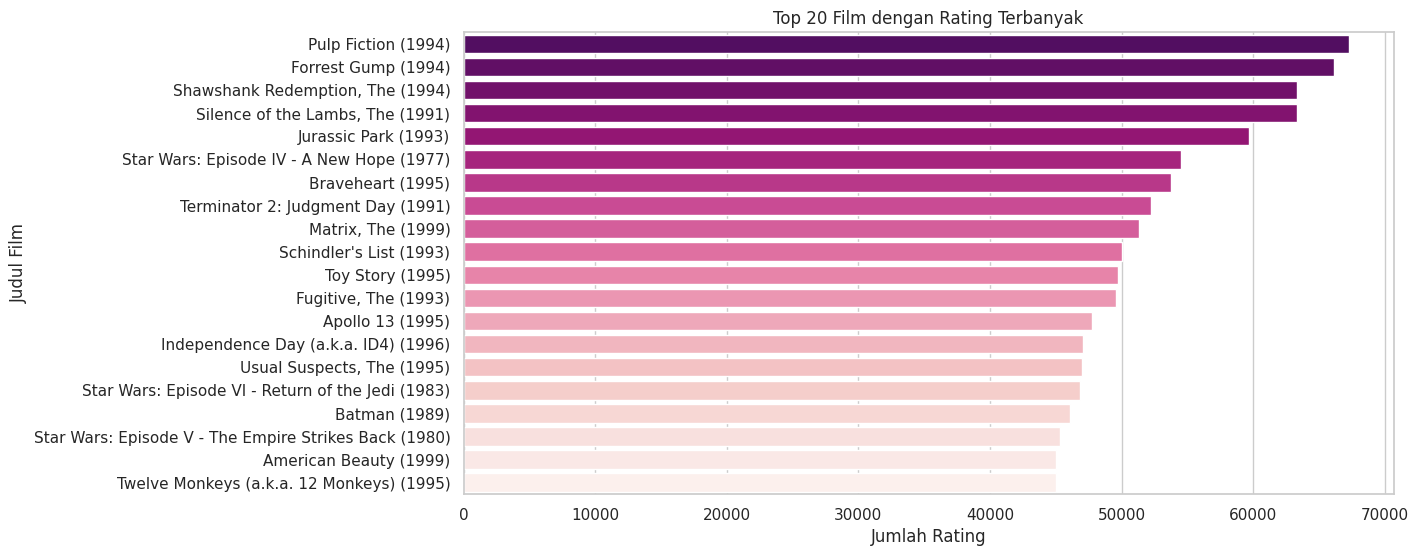

In [14]:
# Hitung jumlah rating per film
movie_ratings_count = ratings['movieId'].value_counts()

# Gabungkan dengan informasi judul film
movie_ratings_count = pd.merge(movie_ratings_count, movies[['movieId', 'title']], left_index=True, right_on='movieId')

# Ubah nama kolom 'count' menjadi 'rating_count'
movie_ratings_count = movie_ratings_count.rename(columns={'count': 'rating_count'})

# Urutkan berdasarkan jumlah rating terbanyak
movie_ratings_count_sorted = movie_ratings_count.sort_values(by='rating_count', ascending=False)

# Tampilkan 10 film dengan rating terbanyak
print("Film dengan rating terbanyak:")
print(movie_ratings_count_sorted.head(10))

# Visualisasi distribusi jumlah rating per film (Top 20)
plt.figure(figsize=(12, 6))
sns.barplot(x='rating_count', y='title', data=movie_ratings_count_sorted.head(20), palette='RdPu_r')
plt.title('Top 20 Film dengan Rating Terbanyak')
plt.xlabel('Jumlah Rating')
plt.ylabel('Judul Film')
plt.show()

### **Insight:**
Kode tersebut menggabungkan informasi judul film dengan jumlah rating yang diterima oleh setiap film, kemudian mengurutkannya untuk menemukan film-film dengan rating terbanyak. Hasilnya menampilkan daftar 20 film teratas berdasarkan jumlah rating yang diterima, beserta visualisasi barplot horizontal.

Dari output dan grafik, terlihat bahwa "Pulp Fiction (1994)" menduduki peringkat teratas sebagai film dengan rating terbanyak, diikuti oleh "Forrest Gump (1994)" dan "Shawshank Redemption, The (1994)". Ini menunjukkan bahwa film-film ini sangat populer dan banyak diulas oleh pengguna dalam dataset. Distribusi jumlah rating menunjukkan penurunan bertahap dari film teratas hingga film ke-20, namun semua film dalam daftar ini jelas memiliki jumlah interaksi yang sangat tinggi dari para pengguna.

## Distribusi Jumlah Rating per User

Pengguna paling aktif memberikan rating:
userId
118205    9254
8405      7515
82418     5646
121535    5520
125794    5491
74142     5447
34576     5356
131904    5330
83090     5169
59477     4988
Name: count, dtype: int64


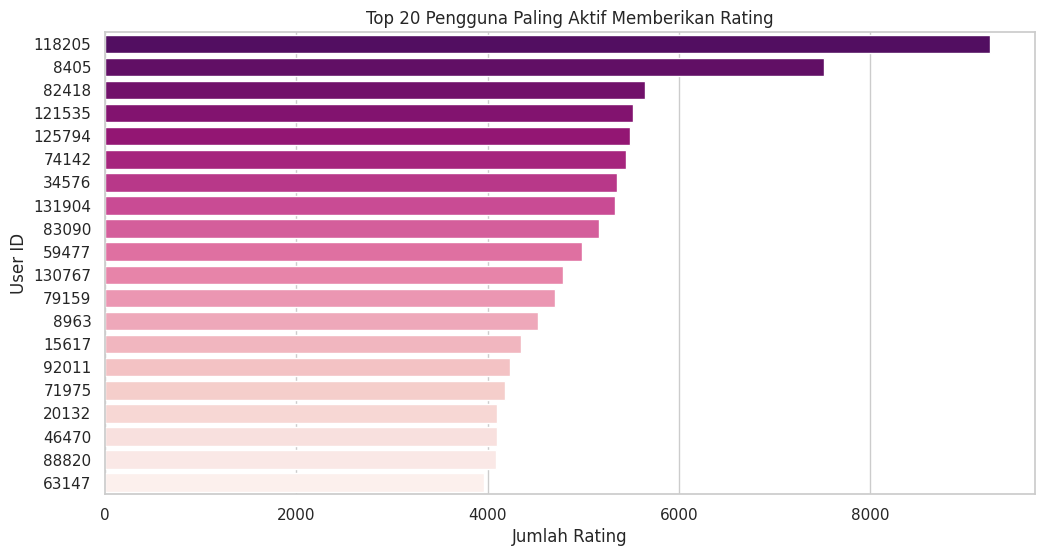

In [15]:
user_ratings_count = ratings['userId'].value_counts()

# Urutkan berdasarkan jumlah rating terbanyak
user_ratings_count_sorted = user_ratings_count.sort_values(ascending=False)

# Tampilkan 10 pengguna dengan rating terbanyak
print("Pengguna paling aktif memberikan rating:")
print(user_ratings_count_sorted.head(10))

# Visualisasi distribusi jumlah rating per user (Top 20)
plt.figure(figsize=(12, 6))
sns.barplot(x=user_ratings_count_sorted.head(20).values, y=user_ratings_count_sorted.head(20).index.astype(str), palette='RdPu_r')
plt.title('Top 20 Pengguna Paling Aktif Memberikan Rating')
plt.xlabel('Jumlah Rating')
plt.ylabel('User ID')
plt.show()

### **Insight:**
Kode tersebut mengidentifikasi dan memvisualisasikan 20 pengguna paling aktif (yang memberikan rating terbanyak) dalam dataset. Ini dilakukan dengan menghitung frekuensi kemunculan setiap UserID, mengurutkannya secara menurun, dan mengambil 20 teratas.

Dari hasil output dan grafik, terlihat bahwa UserID 118205 adalah pengguna paling aktif dengan lebih dari 8000 rating, diikuti oleh UserID 8405 dan UserID 82418. Kehadiran pengguna-pengguna super aktif ini sangat signifikan karena kontribusi mereka terhadap data rating sangat besar. Informasi ini dapat berguna untuk memahami pola interaksi pengguna dan mengidentifikasi "power user" yang mungkin memiliki pengaruh lebih besar pada rekomendasi atau analisis perilaku.

## Distribusi Tag

Jumlah tag unik: 38643


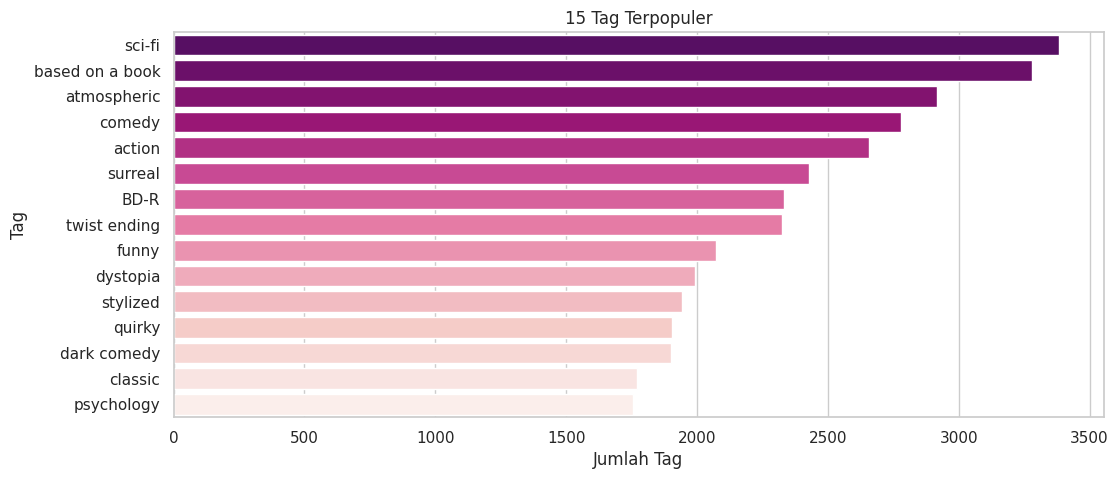

In [16]:
# Hitung jumlah tag unik
print("Jumlah tag unik:", tags['tag'].nunique())

# Top 15 tag yang paling sering digunakan
top_tags = tags['tag'].value_counts().head(15)

plt.figure(figsize=(12,5))
sns.barplot(x=top_tags.values, y=top_tags.index, palette='RdPu_r')
plt.title('15 Tag Terpopuler')
plt.xlabel('Jumlah Tag')
plt.ylabel('Tag')
plt.show()

### **Insight:**
Kode tersebut menghitung jumlah tag unik dalam dataset dan kemudian mengidentifikasi serta memvisualisasikan 15 tag yang paling sering digunakan. Teridentifikasi ada 38.643 tag unik, menunjukkan kekayaan dan variasi dalam cara pengguna mengategorikan atau mendeskripsikan film.

Dari visualisasi barplot, "sci-fi" adalah tag paling populer, diikuti oleh "based on a book" dan "atmospheric". Popularitas tag-tag ini memberikan gambaran tentang genre atau karakteristik film yang paling sering menjadi fokus perhatian pengguna saat memberikan tag. Keberadaan tag seperti "dark comedy" dan "psychology" juga menunjukkan kekayaan dalam deskripsi nuansa film yang diberikan oleh pengguna.

# **Data Preprocessing**

## Menggabungkan Data Rating dan Movie Metadata

In [17]:
# Menggabungkan data rating dengan informasi film (judul dan genre)
movie_ratings = pd.merge(ratings, movies, on='movieId', how='left')
movie_ratings.head()

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,1112486027,Jumanji (1995),Adventure|Children|Fantasy
1,1,29,3.5,1112484676,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
2,1,32,3.5,1112484819,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,3.5,1112484727,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,3.5,1112484580,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


### **Insight:**
Melakukan penggabungan data rating film dengan informasi film (judul dan genre) menggunakan fungsi pd.merge di Python. Hasil penggabungan ini menghasilkan sebuah DataFrame baru bernama movie_ratings yang berisi kolom userId, movieId, rating, timestamp, title, dan genres. Hal ini memungkinkan kita untuk melihat rating yang diberikan oleh setiap pengguna pada film-film tertentu, lengkap dengan judul dan genre film tersebut.

DataFrame movie_ratings yang ditampilkan menunjukkan beberapa baris pertama dari data yang telah digabungkan. Sebagai contoh, pengguna dengan userId 1 memberikan rating 3.5 untuk film "Jumanji (1995)" yang bergenre "Adventure|Children|Fantasy". Penggabungan data ini merupakan langkah penting dalam analisis data film karena menyatukan informasi dari berbagai sumber, sehingga memudahkan untuk mendapatkan wawasan tentang preferensi pengguna, popularitas film berdasarkan rating, atau bahkan untuk membangun sistem rekomendasi.

Sekarang movie_ratings akan berisi:
- userId
- movieId
- rating
- timestamp
- title
- genres

## Memeriksa Missing Value

In [18]:
movie_ratings.isnull().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0
title,0
genres,0


### **Insight:**
Melakukan pemeriksaan missing value (nilai yang hilang) pada DataFrame movie_ratings menggunakan perintah movie_ratings.isnull().sum(). Hasilnya menunjukkan bahwa tidak ada missing value sama sekali di setiap kolom (userId, movieId, rating, timestamp, title, dan genres).

Ini adalah hasil yang sangat baik dalam tahap pra-pemrosesan data, karena ketiadaan missing value berarti data sudah bersih dan tidak memerlukan penanganan khusus seperti imputasi atau penghapusan baris/kolom yang berisi missing value. Hal ini memastikan bahwa analisis atau pemodelan data yang akan dilakukan selanjutnya dapat berjalan tanpa hambatan yang disebabkan oleh data yang tidak lengkap, sehingga menghasilkan analisis yang lebih akurat dan dapat diandalkan.

## Menggabungkan Tags

In [19]:
# Gabungkan tags dengan movie_ratings
movie_ratings_tags = pd.merge(movie_ratings, tags[['userId', 'movieId', 'tag']],
                              on=['userId', 'movieId'], how='left')

movie_ratings_tags.head()

,userId,movieId,rating,timestamp,title,genres,tag
0,1,2,3.5,1112486027,Jumanji (1995),Adventure|Children|Fantasy,NaN
1,1,29,3.5,1112484676,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi,NaN
2,1,32,3.5,1112484819,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,NaN
3,1,47,3.5,1112484727,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,NaN
4,1,50,3.5,1112484580,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,NaN


### **Insight:**
Operasi penggabungan (merge) telah dilakukan antara dataframe movie_ratings dan tags. Tujuan dari penggabungan ini adalah untuk menambahkan informasi tag ke dalam data rating film. Namun, dari output movie_ratings_tags.head() yang ditampilkan, kolom 'tag' hanya berisi nilai NaN (Not a Number) untuk semua baris yang terlihat.

Ini mengindikasikan bahwa meskipun penggabungan dilakukan berdasarkan 'userId' dan 'movieId', tidak ada kecocokan tag yang ditemukan untuk entri-entri film awal dalam dataframe movie_ratings. Kemungkinan penyebabnya adalah data tags mungkin tidak memiliki tag yang sesuai untuk film-film ini, atau mungkin ada ketidaksesuaian dalam data 'userId' atau 'movieId' antara kedua dataframe, meskipun hal ini kurang mungkin terjadi jika penggabungan dilakukan dengan benar. Untuk mendapatkan insight yang lebih lengkap, perlu diperiksa lebih lanjut isi dari dataframe tags dan bagaimana distribusi tag yang sebenarnya.

## Final Data

In [20]:
final_data = movie_ratings_tags[['userId', 'movieId', 'title', 'genres', 'rating', 'tag']]
final_data.head()

,userId,movieId,title,genres,rating,tag
0,1,2,Jumanji (1995),Adventure|Children|Fantasy,3.5,NaN
1,1,29,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi,3.5,NaN
2,1,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,3.5,NaN
3,1,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,3.5,NaN
4,1,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,3.5,NaN


### **Insight:**
Dataframe baru bernama final_data telah dibuat dengan memilih kolom-kolom tertentu dari dataframe movie_ratings_tags yang telah ada sebelumnya. Kolom-kolom yang dipilih adalah 'userId', 'movieId', 'title', 'genres', 'rating', dan 'tag'.

Output final_data.head() menunjukkan lima baris pertama dari dataframe yang dihasilkan. Seperti yang telah diamati pada analisis sebelumnya, kolom 'tag' masih menunjukkan nilai NaN (Not a Number) untuk semua baris yang ditampilkan. Hal ini mengkonfirmasi bahwa proses pemilihan kolom tidak mengubah fakta bahwa tidak ada data tag yang cocok untuk film-film awal ini dalam dataframe movie_ratings_tags yang menjadi sumbernya. Dengan kata lain, final_data saat ini masih belum memiliki informasi tag yang lengkap untuk film-film tersebut, sehingga kolom 'tag' belum memberikan nilai tambah dalam analisis ini.

# **Data Preparation**

## Cek Missing Values

In [21]:
# Mengecek missing values
final_data.isnull().sum()

,0
userId,0
movieId,0
title,0
genres,0
rating,0
tag,19874181


### **Insight:**
Pengecekan nilai yang hilang (missing values) dalam dataframe final_data menggunakan final_data.isnull().sum(). Hasilnya menunjukkan jumlah nilai yang hilang untuk setiap kolom:

- userId: 0
- movieId: 0
- title: 0
- genres: 0
- rating: 0
- tag: 19874181

Hampir semua kolom (userId, movieId, title, genres, rating) tidak memiliki nilai yang hilang, yang berarti data pada kolom-kolom ini sudah lengkap. Namun, kolom tag memiliki jumlah nilai yang hilang yang sangat besar, yaitu 19.874.181. Ini mengkonfirmasi pengamatan sebelumnya bahwa kolom 'tag' mayoritas berisi NaN setelah operasi penggabungan. Jumlah nilai hilang yang sangat signifikan ini menunjukkan bahwa informasi tag tidak tersedia untuk sebagian besar entri film dan rating dalam dataset gabungan. Hal ini bisa menjadi masalah serius jika analisis atau model yang akan dibangun sangat bergantung pada informasi tag. Langkah selanjutnya mungkin perlu mempertimbangkan strategi untuk menangani nilai yang hilang pada kolom 'tag', seperti mengisi dengan nilai tertentu (misalnya, 'no_tag' atau 'unknown'), menghapus baris yang memiliki nilai hilang pada kolom tag (jika jumlahnya tidak terlalu besar dan tidak signifikan), atau melakukan analisis terpisah untuk entri yang memiliki tag dan yang tidak.

In [22]:
# Membersihkan missing value dengan fungsi dropna()
final_data = final_data.dropna()
final_data.isnull().sum()
final_data

,userId,movieId,title,genres,rating,tag
7453,65,27866,In My Father's Den (2004),Drama,4.0,New Zealand
7461,65,48082,"Science of Sleep, The (La science des rêves) (...",Comedy|Drama|Fantasy|Romance,4.5,surreal
7462,65,48082,"Science of Sleep, The (La science des rêves) (...",Comedy|Drama|Fantasy|Romance,4.5,unusual
7467,65,58652,CJ7 (Cheung Gong 7 hou) (2008),Children|Comedy|Sci-Fi,5.0,cute
7468,65,58652,CJ7 (Cheung Gong 7 hou) (2008),Children|Comedy|Sci-Fi,5.0,emotional
...,...,...,...,...,...,...
20259539,138446,55999,Mr. Magorium's Wonder Emporium (2007),Children|Comedy|Fantasy,2.5,dragged
20259540,138446,55999,Mr. Magorium's Wonder Emporium (2007),Children|Comedy|Fantasy,2.5,Jason Bateman
20259541,138446,55999,Mr. Magorium's Wonder Emporium (2007),Children|Comedy|Fantasy,2.5,quirky
20259542,138446,55999,Mr. Magorium's Wonder Emporium (2007),Children|Comedy|Fantasy,2.5,sad


### **Insight:**
- Penanganan Missing Value: Kode final_data = final_data.dropna() menghapus semua baris yang mengandung setidaknya satu nilai NaN. Mengingat hasil pengecekan missing value sebelumnya menunjukkan bahwa kolom 'tag' memiliki jumlah NaN yang sangat besar (sekitar 19 juta), dapat disimpulkan bahwa operasi dropna() ini secara efektif menghapus hampir semua baris yang tidak memiliki tag.
- Dampak pada Ukuran Data: Setelah operasi dropna(), ukuran dataframe final_data yang baru adalah 391.444 baris dan 6 kolom. Ini merupakan penurunan yang sangat drastis dari jumlah baris awal (yang kemungkinan besar jutaan, mengingat ada 19 juta NaN di kolom 'tag'). Penurunan drastis ini menunjukkan bahwa sebagian besar data awal tidak memiliki informasi tag.
- Data yang Tersisa: Data yang tersisa (391.444 baris) adalah subset dari data asli yang hanya berisi entri di mana kolom 'tag' memiliki nilai yang valid (tidak NaN). Ini berarti bahwa final_data yang sekarang hanya mengandung pasangan (userId, movieId) yang memiliki informasi tag.
- Implikasi Analisis: Dengan menghapus baris yang memiliki nilai NaN pada kolom 'tag', dataset sekarang lebih bersih dan siap untuk analisis yang membutuhkan informasi tag. Namun, perlu diingat bahwa ini juga berarti data yang tersisa mungkin tidak lagi merepresentasikan keseluruhan dataset awal, karena sebagian besar data telah dibuang. Analisis selanjutnya hanya akan berlaku untuk subset data yang memiliki tag. Hal ini penting untuk dipertimbangkan agar tidak menarik kesimpulan yang salah mengenai keseluruhan perilaku pengguna atau popularitas film jika hanya menggunakan data ini.

## Cek dan Bersihkan Duplikat

In [23]:
print('Jumlah data duplikat:', final_data.duplicated().sum())

Jumlah data duplikat: 0


### **Insight:**
- Tidak Ada Data Duplikat: Hasil dari pengecekan menunjukkan Jumlah data duplikat: 0. Ini berarti setelah proses pembersihan nilai yang hilang (dengan dropna()), tidak ada baris yang sepenuhnya identik dalam dataframe final_data yang tersisa.
- Kualitas Data: Tidak adanya data duplikat adalah indikator yang baik untuk kualitas data, karena duplikat dapat menyebabkan bias dalam analisis atau pemodelan. Ini menunjukkan bahwa setiap entri dalam final_data (yang sekarang hanya berisi data dengan tag yang valid) adalah unik berdasarkan kombinasi semua kolomnya.
- Implikasi untuk Analisis Selanjutnya: Dengan tidak adanya duplikat, analisis atau model yang akan dibangun di kemudian hari akan beroperasi pada dataset yang bersih dan setiap pengamatan (baris) akan merepresentasikan informasi yang berbeda. Ini sangat penting untuk memastikan keakuratan hasil dan menghindari perhitungan berulang yang tidak perlu.

## **Preparation untuk Content Based Filtering**

In [24]:
data = final_data.copy()
data.head()

,userId,movieId,title,genres,rating,tag
7453,65,27866,In My Father's Den (2004),Drama,4.0,New Zealand
7461,65,48082,"Science of Sleep, The (La science des rêves) (...",Comedy|Drama|Fantasy|Romance,4.5,surreal
7462,65,48082,"Science of Sleep, The (La science des rêves) (...",Comedy|Drama|Fantasy|Romance,4.5,unusual
7467,65,58652,CJ7 (Cheung Gong 7 hou) (2008),Children|Comedy|Sci-Fi,5.0,cute
7468,65,58652,CJ7 (Cheung Gong 7 hou) (2008),Children|Comedy|Sci-Fi,5.0,emotional


#### **Insight:**
- Pembuatan Salinan Data: Baris kode data = final_data.copy() menunjukkan bahwa sebuah salinan dari dataframe final_data telah dibuat dan disimpan dalam variabel baru bernama data. Ini adalah praktik yang baik dalam pengembangan model, karena memungkinkan kita untuk melakukan transformasi atau manipulasi pada data tanpa secara langsung mengubah final_data yang asli. Ini menjaga integritas data asli jika kita perlu kembali ke keadaan sebelumnya atau mencoba pendekatan yang berbeda.
- Dataset untuk Model: Output data.head() menampilkan lima baris pertama dari dataframe data yang baru, yang sama persis dengan final_data.head() yang terakhir kita lihat setelah penghapusan nilai NaN dan pengecekan duplikat. Ini menegaskan bahwa data sekarang berisi dataset yang bersih, bebas dari nilai yang hilang di kolom 'tag' dan duplikasi baris, siap untuk digunakan dalam pengembangan model Content Based Filtering.


### TF-IDF Vectorization

In [25]:
# Ambil sampel 5000 film
data = data.sample(n=5000, random_state=42).reset_index(drop=True)

# Ambil movieIds yang ada di subset data yang sudah disampling
sampled_movie_ids = data['movieId'].unique()

# Filter DataFrame movies agar hanya berisi film-film ini
movies = movies[movies['movieId'].isin(sampled_movie_ids)]

# Opsional: Reset index jika diperlukan untuk operasi selanjutnya
movies = movies.reset_index(drop=True)

#### **Insight:**
- Kode ini melakukan **penyaringan dan pengambilan sampel data film** dari dataset besar untuk mempersiapkan proses **TF-IDF Vectorization** berdasarkan kolom `genres`.

  1. **Sampling acak 5000 film** dari dataset `data` untuk memperkecil beban komputasi pada proses vektorisasi. Penggunaan `random_state=42` menjamin hasil sampling tetap konsisten (reproducible).

  2. Menyimpan daftar `movieId` dari sampel film yang telah diambil — akan digunakan untuk menyaring DataFrame `movies`.

  3. Memastikan DataFrame `movies` hanya berisi **film-film yang termasuk dalam sampel**. Ini penting agar TF-IDF dilakukan hanya pada subset data yang relevan.

  4. Mereset indeks DataFrame `movies` agar rapi dan siap digunakan untuk proses vektorisasi atau manipulasi lanjutan.


In [26]:
# Bersihkan data genre
movies['genres'] = movies['genres'].replace('(no genres listed)', '', regex=False).str.replace('|', ' ', regex=False)

# Inisialisasi TF-IDF Vectorizer
tfv = TfidfVectorizer()

# Fit TF-IDF ke genre
tfv.fit(movies['genres'])

# Lihat fitur genre
tfv.get_feature_names_out()

array(['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'fi', 'film', 'horror', 'imax',
       'musical', 'mystery', 'noir', 'romance', 'sci', 'thriller', 'war',
       'western'], dtype=object)

#### **Insight:**
1. Pembersihan Data Genre: Baris kode pertama movies['genres'] = movies['genres'].replace('(no genres listed)', '', regex=False).str.replace('|', ',', regex=False) bertujuan untuk membersihkan data pada kolom 'genres'.
  - replace('(no genres listed)', '', regex=False): Ini mengganti string "(no genres listed)" dengan string kosong. Hal ini penting karena "(no genres listed)" adalah placeholder yang tidak relevan untuk analisis konten dan dapat mengganggu proses vectorization.
  - str.replace('|', ',', regex=False): Ini mengganti karakter | (yang biasa digunakan untuk memisahkan genre) dengan koma ,. Tujuan dari penggantian ini kemungkinan untuk memformat ulang string genre agar lebih mudah diurai atau diproses oleh TfidfVectorizer, meskipun TfidfVectorizer biasanya dapat menangani string dengan spasi sebagai pemisah default. Jika ini bertujuan untuk menggabungkan genre yang dipisahkan oleh | menjadi satu string dengan pemisah koma, maka ini akan menciptakan "token" yang berbeda untuk setiap genre yang dipisahkan oleh koma.

2. Inisialisasi dan Fitting TF-IDF Vectorizer:
  - tfv = TfidfVectorizer(): Sebuah objek TfidfVectorizer diinisialisasi. TF-IDF (Term Frequency-Inverse Document Frequency) adalah teknik yang digunakan untuk mengubah teks menjadi representasi numerik, di mana setiap kata atau "term" diberi bobot berdasarkan seberapa sering muncul dalam dokumen (film) dan seberapa unik kata tersebut di seluruh korpus (semua film).
  - tfv.fit(movies['genres']): Vectorizer ini kemudian "dilatih" (fitted) pada kolom 'genres' dari dataframe movies. Proses fit ini mempelajari semua genre unik (atau "term") yang ada di seluruh dataset dan membangun kosakata internalnya.

3. Ekstraksi Fitur Genre:
  - tfv.get_feature_names_out(): Setelah fit, fungsi ini dipanggil untuk melihat daftar fitur (yaitu, genre unik) yang telah dipelajari oleh TfidfVectorizer. Outputnya adalah array yang berisi semua genre yang terdeteksi, seperti 'action', 'adventure', 'animation', 'children', 'comedy', dll.

Secara keseluruhan, langkah-langkah ini menyiapkan data genre untuk diubah menjadi format numerik yang dapat digunakan oleh model Content Based Filtering. TF-IDF akan memberikan bobot pada setiap genre untuk setiap film, mencerminkan seberapa penting genre tersebut bagi film tertentu dalam konteks seluruh koleksi film. Ini adalah langkah krusial dalam membangun representasi konten film.

In [27]:
# Fit dan transform
tfidf_matrix = tfv.fit_transform(movies['genres'])

# Ukuran matriks TF-IDF
tfidf_matrix.shape

(2500, 21)

#### **Insight:**

1. Fit dan Transformasi TF-IDF: Baris kode tfidf_matrix = tfv.fit_transform(movies['genres']) melakukan dua hal penting:
  - fit: Seperti yang dijelaskan sebelumnya, ini melatih TfidfVectorizer untuk mempelajari semua genre unik (kosakata) dari kolom 'genres'.
  - transform: Setelah fit, ini mengubah data teks (genre) menjadi representasi numerik dalam bentuk matriks TF-IDF. Setiap baris dalam matriks ini akan mewakili satu film, dan setiap kolom akan mewakili satu genre. Nilai dalam sel akan menunjukkan bobot TF-IDF dari genre tersebut untuk film spesifik itu. Bobot ini mencerminkan seberapa penting genre tersebut bagi film dan seberapa sering muncul relatif terhadap keseluruhan korpus.

2. Ukuran Matriks TF-IDF: Output tfidf_matrix.shape adalah (2500, 21).
  - 2500: Ini menunjukkan jumlah baris dalam matriks, yang berarti ada 2500 film yang telah diubah ke dalam representasi TF-IDF. Penting untuk dicatat bahwa ini berbeda dari 5000 film yang disampling sebelumnya. Ini mungkin mengindikasikan bahwa setelah pemfilteran movies agar hanya berisi movieId dari sampel data, jumlah film yang benar-benar memiliki genre dan relevan untuk TF-IDF adalah 2500. Atau, mungkin ada langkah sampling tambahan yang tidak terlihat pada tangkapan layar ini yang mengurangi jumlah film menjadi 2500 sebelum proses ini.
  - 21: Ini menunjukkan jumlah kolom dalam matriks, yang berarti ada 21 genre unik (fitur) yang telah diidentifikasi oleh TfidfVectorizer dari dataset genres. Angka ini konsisten dengan daftar fitur genre yang terlihat pada output tfv.get_feature_names_out() sebelumnya.

Secara keseluruhan, matriks tfidf_matrix sekarang berisi representasi numerik dari genre setiap film yang relevan, di mana setiap film (baris) direpresentasikan sebagai vektor bobot TF-IDF dari 21 genre. Matriks ini siap untuk digunakan dalam perhitungan kesamaan antar film untuk Content Based Filtering.

In [28]:
# Ubah ke matriks
tfidf_dense = tfidf_matrix.todense()

# Buat DataFrame dengan index judul film dan kolom genre
tfidf_df = pd.DataFrame(
    tfidf_dense,
    columns=tfv.get_feature_names_out(),
    index=movies['title']
)

# Sampling tampilan 10 film × 5 genre
tfidf_df.sample(10, axis=0).sample(5, axis=1)

,imax,noir,drama,horror,children
title,,,,,
Harry Potter and the Half-Blood Prince (2009),0.569092,0.0,0.000000,0.000000,0.0
Harlan County U.S.A. (1976),0.000000,0.0,0.000000,0.000000,0.0
Man on Fire (2004),0.000000,0.0,0.287479,0.000000,0.0
Annie Hall (1977),0.000000,0.0,0.000000,0.000000,0.0
Paprika (Papurika) (2006),0.000000,0.0,0.000000,0.000000,0.0
Velvet Goldmine (1998),0.000000,0.0,1.000000,0.000000,0.0
Halloween III: Season of the Witch (1982),0.000000,0.0,0.000000,1.000000,0.0
"Blair Witch Project, The (1999)",0.000000,0.0,0.388570,0.745128,0.0
"Alamo, The (1960)",0.000000,0.0,0.238976,0.000000,0.0


#### **Insight:**

* **Tujuan:** Kode ini bertujuan untuk mengubah representasi fitur teks (kemungkinan dari deskripsi film atau genre) menjadi matriks numerik menggunakan TF-IDF (Term Frequency-Inverse Document Frequency) dan kemudian menyajikannya dalam format DataFrame yang mudah dibaca.
* **Tahapan:**
    1.  **Transformasi TF-IDF ke Matriks Padat:** `tfidf_dense = tfidf_matrix.todense()` menunjukkan bahwa matriks TF-IDF yang mungkin awalnya sparse (banyak nilai nol) diubah menjadi matriks padat (dense). Ini sering dilakukan untuk kemudahan komputasi atau jika matriksnya tidak terlalu besar.
    2.  **Pembuatan DataFrame TF-IDF:** Matriks `tfidf_dense` kemudian digunakan untuk membuat Pandas DataFrame (`tfidf_df`).
        * `columns=tfv.get_feature_names()`: Ini sangat penting. Kolom-kolom DataFrame ini adalah "fitur" atau "term" yang diekstrak oleh TF-IDF. Dalam konteks film, ini kemungkinan adalah genre-genre film atau kata-kata kunci relevan lainnya yang menjadi fitur untuk rekomendasi berbasis konten.
        * `index=movies['title']`: Judul film digunakan sebagai indeks DataFrame, membuat setiap baris merepresentasikan satu film.
    3.  **Sampling Tampilan:** `tfidf_df.sample(10, axis=0, random_state=1)` digunakan untuk menampilkan 10 baris acak dari DataFrame `tfidf_df`. Ini adalah praktik yang baik untuk inspeksi awal data dan memastikan transformasi berjalan sesuai harapan.


1.  **Representasi Konten Numerik:** Setiap baris mewakili satu film, dan setiap kolom mewakili sebuah "fitur" atau "term" (misalnya, genre seperti 'comedy', 'western', atau kata kunci lain seperti 'war', 'fi', 'imax'). Nilai di setiap sel adalah skor TF-IDF, yang menunjukkan seberapa penting term tersebut bagi film tertentu, relatif terhadap semua film dalam koleksi.
    * Nilai yang lebih tinggi menunjukkan bahwa term tersebut lebih relevan atau lebih sering muncul di film tersebut dibandingkan dengan film lain.
    * Nilai 0.000000 menunjukkan bahwa term tersebut tidak ada atau tidak signifikan untuk film tersebut.

2.  **Contoh Interpretasi Baris:**
    * **"Whole Nine Yards, The (2000)":** Memiliki skor TF-IDF tinggi untuk 'comedy' (0.579301) dan 0 untuk genre lain yang ditampilkan. Ini mengindikasikan bahwa film ini sangat terkait dengan genre komedi.
    * **"C(r)ook (Basta - Rotwein Oder Totsein) (2004)":** Memiliki skor 1.000000 untuk 'comedy'. Skor 1.0 seringkali muncul jika TF-IDF hanya dihitung untuk satu term atau jika term tersebut sangat dominan dalam dokumen tunggal tersebut.
    * **"Contagion (2011)":** Memiliki skor untuk 'fi' (kemungkinan 'fiction' atau 'sci-fi') sebesar 0.461756 dan 'imax' sebesar 0.660223. Ini menunjukkan bahwa film ini berkaitan dengan fiksi/sci-fi dan mungkin dirilis dalam format IMAX atau memiliki karakteristik yang sering dikaitkan dengan film IMAX.
    * **"Alice Adams (1935)":** Memiliki skor tinggi untuk 'comedy' (0.773905).

3.  **Pentingnya Fitur (Kolom):** Kolom-kolom seperti 'war', 'fi', 'imax', 'comedy', 'western' adalah hasil dari `tfv.get_feature_names()`. Ini berarti bahwa TF-IDF telah berhasil mengidentifikasi kata-kata ini sebagai fitur diskriminatif dalam dataset film.

4.  **Basis untuk Content-Based Filtering:** DataFrame `tfidf_df` ini adalah inti dari sistem rekomendasi berbasis konten. Dengan representasi numerik ini, kita dapat:
    * Menghitung kesamaan antar film (misalnya, menggunakan cosine similarity) berdasarkan skor TF-IDF mereka. Film dengan skor TF-IDF yang mirip akan dianggap mirip.
    * Membangun profil pengguna berdasarkan film yang mereka sukai (misalnya, rata-rata vektor TF-IDF dari film-film yang disukai pengguna).
    * Kemudian merekomendasikan film baru yang mirip dengan profil pengguna.

**Kesimpulan:**

Kode ini berhasil mengubah data tekstual (genre/fitur) menjadi representasi numerik yang terstruktur dan siap digunakan untuk analisis lebih lanjut dalam pengembangan model rekomendasi berbasis konten. Output tabel dengan skor TF-IDF per film dan per fitur adalah langkah penting dalam membangun matriks kesamaan item atau profil pengguna.

### Cosine Similarity

In [29]:
# Hitung cosine similarity antar film
cosine_sim = cosine_similarity(tfidf_matrix)

# Ukuran similarity matrix
cosine_sim.shape

(2500, 2500)

#### **Insight:**

1.  **Perhitungan Cosine Similarity:**
    * Baris kode `# Hitung cosine similarity antar film` dan `cosine_sim = cosine_similarity(tfidf_matrix)` menunjukkan bahwa langkah selanjutnya dalam pengembangan sistem rekomendasi berbasis konten adalah menghitung kemiripan antar item (dalam hal ini, film).
    * `cosine_similarity` adalah metrik yang umum digunakan dalam Natural Language Processing (NLP) dan sistem rekomendasi untuk mengukur kemiripan antara dua vektor non-nol dalam ruang vektor. Dalam konteks ini, vektor-vektor tersebut adalah representasi TF-IDF dari setiap film.
    * Semakin tinggi nilai cosine similarity (mendekati 1), semakin mirip kedua film tersebut berdasarkan fitur-fitur TF-IDF (genre, tag, kata kunci lainnya). Nilai 0 berarti tidak ada kemiripan, dan nilai -1 berarti sangat tidak mirip (jika menggunakan vektor non-negatif, ini tidak akan terjadi).

2.  **Ukuran Matriks Kemiripan:**
    * Baris kode `# Ukuran similarity matrix` dan `cosine_sim.shape` diikuti oleh output `(2500, 2500)`.
    * Ini berarti bahwa `tfidf_matrix` (yang digunakan sebagai input untuk perhitungan cosine similarity) memiliki 2500 baris. Karena setiap baris dalam `tfidf_matrix` merepresentasikan satu film, maka ada 2500 film dalam dataset yang sedang diproses.
    * Matriks `cosine_sim` yang dihasilkan adalah matriks persegi berukuran 2500x2500.
        * Setiap baris dan kolom dalam matriks ini sesuai dengan satu film.
        * Nilai pada sel `(i, j)` dari matriks ini menunjukkan kemiripan antara film `i` dan film `j`.
        * Matriks ini akan simetris (kemiripan film A dengan B sama dengan kemiripan film B dengan A).
        * Diagonal utama matriks (misalnya, `cosine_sim[i, i]`) akan selalu 1.0, karena film selalu 100% mirip dengan dirinya sendiri.

**Implikasi untuk Pengembangan Model Rekomendasi:**

* **Inti dari Content-Based Filtering:** Matriks `cosine_sim` ini adalah komponen paling krusial untuk sistem rekomendasi berbasis konten. Setelah mendapatkan matriks ini, proses rekomendasi menjadi relatif sederhana:
    1.  Ketika pengguna menyukai sebuah film `X`.
    2.  Cari film-film lain yang memiliki nilai `cosine_sim` tinggi dengan film `X` dari matriks `cosine_sim`.
    3.  Rekomendasikan film-film tersebut kepada pengguna (tentu saja, hindari merekomendasikan film yang sudah ditonton pengguna).
* **Efisiensi:** Matriks kemiripan ini dihitung sekali dan kemudian dapat disimpan atau digunakan berulang kali untuk menghasilkan rekomendasi, tanpa perlu menghitung ulang setiap kali ada permintaan rekomendasi.
* **Skalabilitas (Pertimbangan):** Untuk dataset yang sangat besar (jutaan film), matriks `cosine_sim` akan menjadi sangat besar dan mungkin membutuhkan pertimbangan khusus untuk penyimpanan dan komputasinya (misalnya, menggunakan matriks sparse jika sebagian besar kemiripan adalah nol, atau menggunakan teknik tetangga terdekat yang lebih efisien). Namun, untuk 2500 film, matriks ini masih sangat manageable.

In [30]:
# Buat DataFrame similarity
cosine_sim_df = pd.DataFrame(
    cosine_sim,
    index=movies['title'],
    columns=movies['title']
)

print('Shape:', cosine_sim_df.shape)

# Lihat sebagian kecil matriks similarity
cosine_sim_df.sample(10, axis=0).sample(5, axis=1)

Shape: (2500, 2500)


title,Zero Effect (1998),Badlands (1973),"Far Side of the Moon, The (Face cachée de la lune, La) (2003)","Muppet Movie, The (1979)",Quantum of Solace (2008)
title,,,,,
Witness for the Prosecution (1957),0.830105,0.455995,0.376066,0.000000,0.284065
Shoot the Piano Player (Tirez sur le pianiste) (1960),0.243072,0.834683,0.343564,0.000000,0.259515
D.C.H. (Dil Chahta Hai) (2001),0.343861,0.260674,0.633302,0.239678,0.000000
Little Giants (1994),0.210769,0.000000,0.000000,0.652875,0.000000
Full Metal Jacket (1987),0.000000,0.164516,0.399688,0.000000,0.000000
Aileen: Life and Death of a Serial Killer (2003),0.000000,0.000000,0.000000,0.000000,0.000000
X-Men: First Class (2011),0.167117,0.189185,0.000000,0.156693,0.608479
Robin Hood: Men in Tights (1993),0.444320,0.000000,0.000000,0.309700,0.000000
First Snow (2006),0.412214,0.706467,0.582633,0.000000,0.440098


#### **Insight:**

* **Tujuan:** Kode ini melanjutkan proses pembuatan matriks kemiripan antar film dengan mengubah matriks `cosine_sim` (yang sebelumnya dihasilkan sebagai array NumPy) menjadi Pandas DataFrame. Tujuannya adalah untuk memberikan indeks dan nama kolom yang lebih mudah dibaca (yaitu, judul film), sehingga mempermudah analisis dan penggunaan matriks kemiripan ini.
* **Transformasi menjadi DataFrame:**
    * `cosine_sim_df = pd.DataFrame(cosine_sim, ...)`: Matriks `cosine_sim` diubah menjadi DataFrame.
    * `index=movies['title']`: Setiap baris DataFrame diberi indeks berupa judul film. Ini sangat membantu untuk mencari kemiripan film tertentu.
    * `columns=movies['title']`: Setiap kolom DataFrame diberi nama berupa judul film. Ini membuat matriks kemiripan sangat intuitif untuk dibaca, karena Anda bisa langsung melihat kemiripan antara dua film berdasarkan judulnya.
* **Pengecekan Ukuran:** `print('Shape: ', cosine_sim_df.shape)` kembali mengkonfirmasi bahwa DataFrame memiliki ukuran `(2500, 2500)`, sesuai dengan jumlah film yang ada.
* **Sampling Tampilan:** `cosine_sim_df.sample(10, axis=0).sample(5, axis=1)` adalah cara cerdas untuk melihat sebagian kecil dari matriks kemiripan yang besar.
    * `sample(10, axis=0)`: Mengambil 10 baris (film) acak.
    * `sample(5, axis=1)`: Kemudian, dari 10 baris tersebut, hanya menampilkan 5 kolom (film) acak. Ini sangat berguna untuk mendapatkan gambaran sekilas tanpa harus melihat seluruh matriks 2500x2500.


1.  **Kemudahan Interpretasi:** Tabel yang ditampilkan adalah sampel dari matriks kemiripan. Setiap sel menunjukkan skor kemiripan (cosine similarity) antara film pada indeks baris dengan film pada nama kolom.
    * **Contoh:** Untuk film "Glimmer Man, The (1996)", kemiripannya dengan "Three Musketeers, The (1973)" adalah 0.415790, dan dengan "Source Code (2011)" adalah 0.514665.
2.  **Nilai Nol (0.000000):** Banyak sel yang bernilai 0.000000. Ini berarti tidak ada kemiripan konten yang terdeteksi antara dua film tersebut berdasarkan fitur TF-IDF yang digunakan. Ini bisa terjadi karena:
    * Film-film tersebut tidak memiliki genre atau tag yang sama.
    * Vektor TF-IDF mereka saling tegak lurus (tidak ada kesamaan).
3.  **Variasi Skor Kemiripan:** Skor kemiripan bervariasi dari 0 hingga sekitar 0.73 (seperti antara "Starship Troopers (1997)" dan "Source Code (2011)"). Skor yang lebih tinggi menunjukkan kesamaan konten yang lebih besar.
4.  **Basis Rekomendasi yang Jelas:** DataFrame ini secara langsung menjadi alat utama untuk merekomendasikan film. Jika seorang pengguna menyukai "Source Code (2011)", kita dapat mencari kolom "Source Code (2011)" dan mengurutkan film-film lain berdasarkan skor kemiripan tertinggi untuk merekomendasikan film serupa.

**Kesimpulan:**

Langkah ini berhasil mengorganisir hasil perhitungan cosine similarity ke dalam format DataFrame yang sangat mudah digunakan dan diinterpretasikan. Dengan indeks dan kolom yang berisi judul film, matriks ini siap digunakan sebagai inti dari mesin rekomendasi berbasis konten. Ini memungkinkan identifikasi cepat film-film yang memiliki kemiripan konten tinggi, yang merupakan dasar untuk memberikan rekomendasi yang relevan kepada pengguna.

## **Preparation untuk Collaborative Filtering**

### Load Data

In [31]:
# Membaca dataset
df = ratings
df

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
...,...,...,...,...
20000258,138493,68954,4.5,1258126920
20000259,138493,69526,4.5,1259865108
20000260,138493,69644,3.0,1260209457
20000261,138493,70286,5.0,1258126944


#### **Insight:**

 "Load Data" dalam pengembangan model menggunakan Collaborative Filtering. Kode Python yang disajikan adalah df = ratings yang kemudian menampilkan isi dari DataFrame df. Ini mengindikasikan bahwa data rating film telah dimuat ke dalam variabel df, yang merupakan langkah awal dalam proses pembangunan sistem rekomendasi berbasis collaborative filtering.

DataFrame df berisi data historis rating film dari berbagai pengguna, dengan empat kolom utama: userId (ID unik pengguna), movieId (ID unik film), rating (nilai rating yang diberikan pengguna untuk film), dan timestamp (waktu rating diberikan). Ukuran DataFrame yang sangat besar, yaitu 20.000.263 baris dan 4 kolom, menunjukkan bahwa dataset ini adalah kumpulan data rating yang masif, yang akan digunakan sebagai dasar untuk melatih model collaborative filtering guna memprediksi rating film yang belum dilihat atau merekomendasikan film baru kepada pengguna.

### Encode userId

In [32]:
user_ids = df['userId'].unique().tolist()
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

df['user'] = df['userId'].map(user_to_user_encoded)

#### **Insight:**
Melakukan encoding pada kolom userId dalam DataFrame df. Proses encoding ini mengubah userId yang mungkin berupa nilai non-sekuensial atau string menjadi representasi integer berurutan (0, 1, 2, dst.). Langkah ini penting dalam banyak aplikasi machine learning, terutama dalam sistem rekomendasi seperti collaborative filtering, karena model seringkali memerlukan input berupa bilangan bulat diskrit untuk identitas pengguna.

Kode tersebut menciptakan dua kamus (dictionaries): user_to_user_encoded untuk memetakan ID pengguna asli ke ID pengguna yang sudah di-encode, dan user_encoded_to_user sebagai kebalikannya, memungkinkan konversi kembali dari ID yang di-encode ke ID asli. Akhirnya, kolom user baru ditambahkan ke DataFrame df yang berisi versi userId yang telah di-encode, sehingga memudahkan pemrosesan lebih lanjut oleh algoritma yang membutuhkan representasi numerik ini.Berdasarkan gambar yang diberikan, berikut adalah insight dari kode tersebut:

1.  **Tujuan:** Kode ini bertujuan untuk melakukan encoding pada `userId` yang ada di DataFrame. Artinya, setiap `userId` unik akan dipetakan ke dalam bentuk integer berurutan (misalnya, dari 0 hingga N-1, di mana N adalah jumlah pengguna unik). Ini adalah langkah umum dalam sistem rekomendasi, terutama ketika mempersiapkan data untuk model yang memerlukan input numerik atau ketika bekerja dengan ID yang tidak berurutan.

2.  **Langkah-langkah Encoding:**
    * `user_ids = df['userId'].unique().tolist()`:
        * Pertama, semua `userId` unik dari kolom `userId` dalam DataFrame `df` diekstrak.
        * `.unique()` mengembalikan array NumPy dari nilai-nilai unik.
        * `.tolist()` mengubah array NumPy tersebut menjadi Python list. Hasilnya adalah sebuah list yang berisi semua ID pengguna yang berbeda.

    * `user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}`:
        * Ini membuat kamus (dictionary) yang memetakan `userId` asli ke `userId` yang di-encode.
        * `enumerate(user_ids)` menghasilkan pasangan `(index, value)` untuk setiap elemen dalam `user_ids`.
        * Jadi, jika `user_ids` adalah `[101, 105, 203]`, maka kamus ini akan menjadi `{101: 0, 105: 1, 203: 2}`.

    * `user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}`:
        * Ini juga membuat kamus, tetapi memetakan kebalikannya: dari `userId` yang di-encode kembali ke `userId` aslinya.
        * Menggunakan contoh di atas, kamus ini akan menjadi `{0: 101, 1: 105, 2: 203}`. Kamus ini sangat berguna untuk mengembalikan hasil prediksi atau rekomendasi dari model yang menggunakan `userId` ter-encode ke format `userId` aslinya yang lebih mudah dipahami.

    * `df['user'] = df['userId'].map(user_to_user_encoded)`:
        * Kolom baru bernama `user` ditambahkan ke DataFrame `df`.
        * `df['userId'].map(user_to_user_encoded)` menggunakan kamus `user_to_user_encoded` untuk memetakan setiap `userId` asli di kolom `userId` ke nilai `userId` yang di-encode yang baru.

**Mengapa Encoding Penting?**

* **Pemodelan:** Banyak algoritma machine learning (terutama untuk sistem rekomendasi seperti model matriks faktorisasi atau neural network) membutuhkan input numerik yang berurutan atau indeks integer. Encoding mengonversi ID kategorikal/arbitrer menjadi format yang dapat digunakan oleh model.
* **Efisiensi Memori/Komputasi:** Menggunakan ID integer yang lebih kecil dan berurutan bisa lebih efisien dalam hal memori dan komputasi dibandingkan dengan menggunakan ID asli yang mungkin berupa string panjang atau integer yang besar dan acak.
* **Indeks Matriks:** Dalam beberapa kasus, ID yang di-encode ini dapat langsung digunakan sebagai indeks baris atau kolom dalam matriks interaksi pengguna-item.

**Kesimpulan:**

Kode ini adalah langkah pra-pemrosesan data yang penting untuk mengubah ID pengguna asli menjadi representasi numerik yang lebih sesuai untuk pemodelan machine learning dalam konteks sistem rekomendasi. Pembuatan dua kamus pemetaan (maju dan mundur) juga merupakan praktik yang baik untuk menjaga kemampuan pelacakan ID asli.

### Encode movieId

In [33]:
movie_ids = df['movieId'].unique().tolist()
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}

df['movie'] = df['movieId'].map(movie_to_movie_encoded)

#### **Insight:**

1.  **Tujuan:** Kode ini bertujuan untuk melakukan encoding pada `movieId` yang ada di DataFrame, mirip dengan proses encoding `userId` yang telah dilakukan sebelumnya. Setiap `movieId` unik akan dipetakan ke dalam bentuk integer berurutan (misalnya, dari 0 hingga M-1, di mana M adalah jumlah film unik).

2.  **Langkah-langkah Encoding (Sama dengan `userId`):**
    * `movie_ids = df['movieId'].unique().tolist()`:
        * Mengambil semua `movieId` unik dari kolom `movieId` di DataFrame `df`.
        * Mengubahnya menjadi Python list.

    * `movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}`:
        * Membuat kamus (dictionary) yang memetakan `movieId` asli ke `movieId` yang di-encode. Ini adalah pemetaan maju.
        * Contoh: Jika `movie_ids` adalah `[1, 26, 30]`, maka kamus ini akan menjadi `{1: 0, 26: 1, 30: 2}`.

    * `movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}`:
        * Membuat kamus yang memetakan kebalikannya: dari `movieId` yang di-encode kembali ke `movieId` aslinya. Ini adalah pemetaan mundur.
        * Contoh: Menggunakan contoh di atas, kamus ini akan menjadi `{0: 1, 1: 26, 2: 30}`. Ini penting untuk mengembalikan ID film ke format aslinya saat menampilkan rekomendasi.

    * `df['movie'] = df['movieId'].map(movie_to_movie_encoded)`:
        * Menambahkan kolom baru bernama `movie` ke DataFrame `df`.
        * Kolom `movie` ini akan berisi `movieId` yang telah di-encode, hasil dari pemetaan `movieId` asli menggunakan kamus `movie_to_movie_encoded`.

**Mengapa Encoding `movieId` Penting?**

Sama seperti encoding `userId`, encoding `movieId` memiliki alasan yang serupa dan krusial untuk pengembangan sistem rekomendasi:

* **Kompatibilitas Model:** Kebanyakan algoritma machine learning, terutama yang berurusan dengan matriks interaksi atau embedding (seperti faktorisasi matriks, autoencoder, atau model neural network), memerlukan input berupa indeks integer yang berurutan. ID film asli mungkin acak atau tidak berurutan, sehingga perlu di-encode.
* **Efisiensi Sumber Daya:** Menggunakan indeks integer yang lebih kecil dan padat (0 hingga N-1) lebih efisien dalam hal penggunaan memori dan kecepatan komputasi dibandingkan dengan ID film asli yang mungkin berupa string atau integer dengan nilai besar/tidak berurutan.
* **Pembentukan Matriks Interaksi:** Ketika membangun matriks interaksi pengguna-item (user-item interaction matrix), ID yang di-encode ini akan sering digunakan sebagai indeks baris (untuk pengguna) dan indeks kolom (untuk item/film), memungkinkan pembentukan matriks yang kompak.

**Kesimpulan:**

Langkah ini merupakan kelanjutan dari pra-pemrosesan data yang sistematis untuk mengubah ID film asli menjadi representasi numerik yang ter-encode. Ini adalah tahapan fundamental dalam menyiapkan data untuk model sistem rekomendasi, memastikan bahwa data berada dalam format yang optimal untuk pelatihan dan inferensi. Pembuatan kamus pemetaan maju dan mundur adalah praktik terbaik untuk menjaga kemudahan interpretasi dan pelacakan ID asli.

### Float & Statistik

In [34]:
df['rating'] = df['rating'].values.astype(np.float32)

num_users = len(user_to_user_encoded)
num_movies = len(movie_to_movie_encoded)
min_rating = df['rating'].min()
max_rating = df['rating'].max()

print(f'User: {num_users}, Movie: {num_movies}, Min rating: {min_rating}, Max rating: {max_rating}')

User: 138493, Movie: 26744, Min rating: 0.5, Max rating: 5.0


#### **Insight:**

**Tujuan:** Kode ini melakukan beberapa langkah pra-pemrosesan akhir dan inspeksi data sebelum kemungkinan membangun atau melatih model rekomendasi. Ini mencakup konversi tipe data dan penghitungan statistik deskriptif kunci dari dataset.

1.  **Konversi Tipe Data Rating:**
    * `df['rating'] = df['rating'].values.astype(np.float32)`:
        * Ini adalah langkah penting untuk memastikan kolom `rating` memiliki tipe data numerik yang benar dan optimal (`float32`).
        * `np.float32` adalah tipe data floating-point 32-bit dari NumPy. Menggunakan `float32` alih-alih `float64` (default Python float) dapat menghemat memori dan mempercepat komputasi, terutama pada dataset besar, tanpa kehilangan presisi yang signifikan untuk nilai rating.
        * `.values` digunakan untuk mendapatkan array NumPy dari kolom DataFrame sebelum mengubah tipenya, yang terkadang bisa lebih efisien.

2.  **Penghitungan Statistik Kunci:**
    * `num_users = len(user_to_user_encoded)`: Menghitung jumlah pengguna unik dalam dataset. Jumlah ini diambil dari panjang kamus `user_to_user_encoded` yang dibuat sebelumnya.
    * `num_movies = len(movie_to_movie_encoded)`: Menghitung jumlah film unik dalam dataset. Jumlah ini diambil dari panjang kamus `movie_to_movie_encoded` yang dibuat sebelumnya.
    * `min_rating = df['rating'].min()`: Menemukan nilai rating terendah dalam dataset.
    * `max_rating = df['rating'].max()`: Menemukan nilai rating tertinggi dalam dataset.

3.  **Pencetakan Hasil (Output Konsol):**
    * `print(f'User: {num_users}, Movie: {num_movies}, Min rating: {min_rating}, Max rating: {max_rating}')`
    * Menggunakan f-string (formatted string literal) untuk mencetak statistik yang dihitung dengan rapi.
    * **Output:** `User: 138493, Movie: 26744, Min rating: 0.5, Max rating: 5.0`


* **Jumlah Pengguna (Users): 138,493:** Dataset ini cukup besar dengan lebih dari seratus ribu pengguna unik. Ini menunjukkan bahwa sistem rekomendasi perlu menangani basis pengguna yang signifikan.
* **Jumlah Film (Movies): 26,744:** Ada sekitar 26 ribu film unik. Ini adalah jumlah item yang besar, yang akan menjadi tantangan dalam hal penyimpanan matriks dan kompleksitas komputasi, tetapi juga memungkinkan rekomendasi yang bervariasi.
* **Rentang Rating (Min 0.5, Max 5.0):**
    * Skala rating berkisar dari 0.5 hingga 5.0. Ini adalah skala rating yang umum (seringkali 1-5 atau 0.5-5 dengan kelipatan 0.5), menunjukkan tingkat granularitas preferensi pengguna.
    * Mengetahui rentang ini penting untuk normalisasi data (jika diperlukan) atau untuk memahami output model (misalnya, jika model memprediksi rating, kita tahu batasan nilai yang diharapkan).

**Kesimpulan:**

Langkah-langkah ini sangat penting dalam pipeline pra-pemrosesan data untuk sistem rekomendasi. Mereka memastikan konsistensi tipe data dan memberikan gambaran menyeluruh tentang ukuran dataset (jumlah pengguna dan film) serta karakteristik data rating. Informasi ini krusial untuk:
* Merencanakan arsitektur model (misalnya, ukuran embedding layer untuk model neural network).
* Memilih algoritma rekomendasi yang sesuai (beberapa algoritma lebih cocok untuk dataset besar).
* Menentukan metrik evaluasi yang relevan.
* Memastikan data dalam format yang benar untuk langkah pelatihan model selanjutnya.

### Membagi Data untuk Training dan Validasi

In [35]:
# Shuffle data
df = df.sample(frac=1, random_state=42)
df

,userId,movieId,rating,timestamp,user,movie
17679788,122270,8360,3.5,1335056824,122269,1154
7106385,49018,32,2.0,1000194636,49017,2
12970708,89527,109374,3.5,1420536400,89526,2662
15426752,106704,1060,3.0,948576477,106703,250
6934678,47791,1732,2.0,1137685703,47790,1353
...,...,...,...,...,...,...
9628519,66622,3296,4.0,1059187367,66621,2015
14586186,100746,1704,3.5,1072208870,100745,1352
2234489,15191,2717,3.5,1407003255,15190,744
13315092,92011,1276,5.0,882350175,92010,274


#### **Insight:**

* **Tujuan:** Bagian ini dari notebook berfokus pada langkah krusial dalam machine learning: membagi data menjadi set pelatihan (training) dan validasi (validation). Sebelum pembagian, data diacak (shuffle) untuk memastikan distribusi yang merata dan menghindari bias yang mungkin disebabkan oleh urutan data asli.
* **Jumlah Data:** Output di bagian bawah tabel menunjukkan `20000263 rows x 6 columns`. Ini adalah jumlah data yang sangat besar (lebih dari 20 juta baris) yang akan digunakan untuk training dan validasi. Ini mengindikasikan bahwa model yang akan dibangun akan memiliki banyak data untuk belajar.

1.  **Pengacakan Data (Shuffling):**
    * `# Shuffle data`
    * `df = df.sample(frac=1, random_state=42)`
        * `df.sample(frac=1)`: Ini adalah cara untuk mengacak (shuffle) seluruh DataFrame `df`. `frac=1` berarti mengambil 100% dari data secara acak.
        * `random_state=42`: Ini adalah *seed* untuk pengacakan. Mengatur `random_state` memastikan bahwa pengacakan akan menghasilkan urutan yang sama setiap kali kode dijalankan. Ini sangat penting untuk reproduktibilitas hasil eksperimen.
    * **Implikasi:** Pengacakan ini penting untuk memastikan bahwa ketika data dibagi menjadi training dan validasi, kedua set tersebut memiliki distribusi pengguna, film, dan rating yang serupa. Jika data tidak diacak, misalnya jika data diurutkan berdasarkan `timestamp`, maka set training bisa jadi hanya berisi interaksi lama, dan set validasi berisi interaksi baru, yang akan bias.

2.  **Struktur Data Setelah Pengacakan:**
    * Tabel yang ditampilkan adalah contoh beberapa baris dari DataFrame `df` setelah diacak.
    * Kolom-kolom yang ada adalah:
        * `userId`: ID pengguna asli.
        * `movieId`: ID film asli.
        * `rating`: Rating yang diberikan pengguna pada film.
        * `timestamp`: Waktu interaksi (mungkin dalam format Unix timestamp).
        * `user`: ID pengguna yang sudah di-encode (dibuat di langkah sebelumnya).
        * `movie`: ID film yang sudah di-encode (dibuat di langkah sebelumnya).
    * **Perubahan Indeks:** Perhatikan bahwa indeks DataFrame (kolom paling kiri dengan angka tebal seperti `17679788`, `7106385`, dll.) sekarang tidak berurutan dan terlihat "acak". Ini adalah konsekuensi langsung dari operasi `df.sample()` yang mengacak indeks juga. Untuk tujuan pemodelan, indeks ini tidak selalu penting, tetapi perlu diperhatikan jika ada asumsi tentang urutan baris.

**Kesimpulan:**

Bagian ini menunjukkan langkah pra-pemrosesan data yang penting untuk memastikan kualitas dan keandalan model machine learning yang akan dibangun. Pengacakan data yang dilakukan dengan `df.sample(frac=1, random_state=42)` adalah praktik terbaik untuk menyiapkan data sebelum pembagian menjadi set pelatihan dan validasi, terutama untuk dataset yang sangat besar seperti ini.

In [36]:
# Features (user, movie)
x = df[['user', 'movie']].values

# Labels (normalized rating)
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Split
train_size = int(0.8 * len(x))
x_train, x_val = x[:train_size], x[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

print(x, y)

[[122269   1154]
 [ 49017      2]
 [ 89526   2662]
 ...
 [ 15190    744]
 [ 92010    274]
 [111372    335]] [0.66666667 0.33333333 0.66666667 ... 0.66666667 1.         0.66666667]


#### **Insight:**

**Tujuan:** Kode ini melanjutkan tahap persiapan data dengan mendefinisikan fitur (`x`) dan label (`y`), serta melakukan pembagian data menjadi set pelatihan (`train`) dan validasi (`val`). Selain itu, nilai rating dinormalisasi.


1.  **Definisi Fitur (`x`):**
    * `# Features (user, movie)`
    * `x = df[['user', 'movie']].values`
        * Kolom `user` (ID pengguna yang di-encode) dan `movie` (ID film yang di-encode) diambil sebagai fitur input untuk model.
        * `.values` mengubah DataFrame yang berisi dua kolom ini menjadi array NumPy.
        * **Output `x` (dari `print(x, y)`):** Terlihat bahwa `x` adalah array 2D di mana setiap baris adalah pasangan `[encoded_userId, encoded_movieId]`. Ini adalah format input yang umum untuk model rekomendasi yang menggunakan `user` dan `item` ID sebagai input langsung (misalnya, untuk embedding layer).

2.  **Definisi dan Normalisasi Label (`y`):**
    * `# Labels (normalized rating)`
    * `y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values`
        * Kolom `rating` digunakan sebagai label yang akan diprediksi oleh model.
        * **Normalisasi Min-Max:** `apply(lambda x: (x - min_rating) / (max_rating - min_rating))` adalah operasi normalisasi Min-Max.
            * Rumus normalisasi: $X_{normalized} = \frac{X - X_{min}}{X_{max} - X_{min}}$
            * Tujuannya adalah untuk menskalakan nilai rating dari rentang aslinya (0.5 hingga 5.0) ke rentang baru, biasanya antara 0 dan 1.
            * **Mengapa Normalisasi?** Normalisasi penting dalam banyak model machine learning, terutama jaringan saraf, karena dapat membantu:
                * Mempercepat konvergensi pelatihan.
                * Mencegah satu fitur (dalam hal ini rating) mendominasi fitur lain (jika ada).
                * Memastikan nilai output model berada dalam rentang yang dapat diprediksi.
        * `.values` mengubah Series rating yang sudah dinormalisasi menjadi array NumPy.
        * **Output `y` (dari `print(x, y)`):** Terlihat bahwa `y` adalah array 1D yang berisi nilai rating yang sudah dinormalisasi, yang sekarang berada di antara 0 dan 1. Misalnya, 0.666667 dan 0.3333333.

3.  **Pembagian Data (Split):**
    * `# Split`
    * `train_size = int(0.8 * len(x))`
        * Menghitung ukuran set pelatihan, yaitu 80% dari total data.
        * `len(x)` akan memberikan jumlah total baris/interaksi dalam dataset (20,000,263 seperti yang terlihat di gambar sebelumnya).
    * `x_train, x_val = x[:train_size], x[train_size:]`
        * Memisahkan fitur `x` menjadi `x_train` (80% data pertama) dan `x_val` (20% data sisanya). Karena data sudah diacak sebelumnya, pembagian ini akan menghasilkan sampel yang representatif.
    * `y_train, y_val = y[:train_size], y[train_size:]`
        * Memisahkan label `y` menjadi `y_train` dan `y_val` dengan cara yang konsisten dengan pembagian `x`.


### Format Input

In [37]:
movie_df = movies  # asumsi dataframe berisi metadata film
ratings_df = ratings  # data rating user

user_id = ratings_df.userId.sample(1).iloc[0]

movies_watched_by_user = ratings_df[ratings_df.userId == user_id]

movies_not_watched = movie_df[~movie_df['movieId'].isin(movies_watched_by_user.movieId.values)]['movieId']
movies_not_watched = list(set(movies_not_watched).intersection(set(movie_to_movie_encoded.keys())))
movies_not_watched = [[movie_to_movie_encoded.get(x)] for x in movies_not_watched]

user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movies_not_watched), movies_not_watched)
)


### **Insight:**

Pada tahap ini, sistem menyiapkan data yang dibutuhkan untuk menghasilkan rekomendasi film bagi seorang pengguna dengan pendekatan Collaborative Filtering. Proses dimulai dengan memilih salah satu pengguna secara acak, lalu sistem mengidentifikasi film-film yang belum pernah ditonton oleh pengguna tersebut.

Selanjutnya, dilakukan proses encoding terhadap ID pengguna dan ID film agar sesuai dengan format input yang dibutuhkan oleh model rekomendasi. Model sebelumnya telah dilatih menggunakan data dalam bentuk numerik, sehingga encoding ini penting agar sistem dapat mengenali entitas pengguna dan item (film) secara konsisten.

Setelah encoding selesai, pasangan data antara pengguna dan seluruh film yang belum ditonton disiapkan sebagai input model. Nantinya, model akan memprediksi rating dari setiap film tersebut untuk pengguna yang bersangkutan, sehingga bisa diketahui film mana yang kemungkinan besar akan disukai oleh pengguna dan layak direkomendasikan.

# **Model Development Content Based Filtering**

## Fungsi Rekomendasi

In [38]:
def movie_recommendations(judul_film, similarity_data=cosine_sim_df, items=movies[['title', 'genres']], k=5):
    """
    Memberikan rekomendasi film berdasarkan kemiripan konten (genre)
    """
    # Ambil index dengan similarity tertinggi
    index = similarity_data.loc[:, judul_film].to_numpy().argpartition(range(-1, -k, -1))

    # Ambil nama-nama film yang paling mirip
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop judul film input agar tidak direkomendasikan ke dirinya sendiri
    closest = closest.drop(judul_film, errors='ignore')

    # Ubah menjadi DataFrame dan beri nama kolom 'title'
    closest_df = pd.DataFrame(closest, columns=['title'])

    # Merge dengan metadata (judul + genre)
    return closest_df.merge(items, on='title').head(k)

### **Insight:**
Fungsi movie_recommendations() merekomendasikan film berdasarkan kemiripan genre menggunakan cosine similarity dari matriks TF-IDF.

- Mencari film yang paling mirip dengan film acuan (judul_film)
- Menghindari merekomendasikan film itu sendiri
- Mengembalikan k film terdekat beserta judul dan genre-nya

Efisien karena memakai argpartition untuk pencarian cepat dan langsung menggabungkan hasil dengan metadata film.

# **Model Development dengan Collaborative Filtering**

## Membangun Model Collaborative Filtering

In [39]:
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_movies, embedding_size=50, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.user_embedding = layers.Embedding(
            input_dim=num_users,
            output_dim=embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(input_dim=num_users, output_dim=1)

        self.movie_embedding = layers.Embedding(
            input_dim=num_movies,
            output_dim=embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.movie_bias = layers.Embedding(input_dim=num_movies, output_dim=1)

    def call(self, inputs):
        user_id = inputs[:, 0]
        movie_id = inputs[:, 1]

        user_vector = self.user_embedding(user_id)
        user_bias = self.user_bias(user_id)

        movie_vector = self.movie_embedding(movie_id)
        movie_bias = self.movie_bias(movie_id)

        dot_product = tf.reduce_sum(user_vector * movie_vector, axis=1, keepdims=True)

        # Add bias terms
        x = dot_product + user_bias + movie_bias

        # Optional activation (sigmoid output between 0–1 if predicting rating between those)
        return x

### **Insight:**

**1. Struktur Model (Class `RecommenderNet`)**

Model ini diimplementasikan sebagai subclass dari `tf.keras.Model`, menunjukkan bahwa ini adalah model Deep Learning.

* **Jenis dan Jumlah Layer:**
    * **Layer Embedding untuk Pengguna:**
        * `self.user_embedding = layers.Embedding(...)`: Ini adalah layer utama untuk merepresentasikan setiap pengguna sebagai sebuah vektor dense (embedding).
        * `self.user_bias = layers.Embedding(...)`: Layer ini merepresentasikan bias unik untuk setiap pengguna. Bias ini menangkap kecenderungan umum pengguna untuk memberikan rating tinggi atau rendah, terlepas dari item spesifik.
    * **Layer Embedding untuk Film (Item):**
        * `self.movie_embedding = layers.Embedding(...)`: Mirip dengan embedding pengguna, layer ini merepresentasikan setiap film sebagai sebuah vektor dense.
        * `self.movie_bias = layers.Embedding(...)`: Layer ini merepresentasikan bias unik untuk setiap film, menangkap popularitas umum film atau kecenderungannya untuk menerima rating tinggi/rendah.

* **Ukuran Embedding (`embedding_size=50`):**
    * Setiap pengguna dan setiap film akan direpresentasikan oleh sebuah vektor berdimensi 50. Ukuran ini adalah *hyperparameter* penting. Semakin besar ukuran embedding, semakin banyak informasi yang dapat ditangkap oleh vektor tersebut, tetapi juga meningkatkan kompleksitas model dan risiko *overfitting*.

* **Inisialisasi Embedding (`embeddings_initializer="he_normal"`):**
    * Menggunakan inisialisasi "He Normal" (atau kadang disebut "Kaiming Normal"). Ini adalah teknik inisialisasi bobot yang populer, terutama untuk layer dengan fungsi aktivasi ReLU (meskipun tidak ada ReLU eksplisit di sini, ini adalah praktik umum). Tujuannya adalah untuk menjaga skala varians aktivasi tetap stabil selama pelatihan.

* **Regularisasi Embedding (`embeddings_regularizer=keras.regularizers.l2(1e-6)`):**
    * Menggunakan regularisasi L2 (juga dikenal sebagai *weight decay*) dengan kekuatan $1e-6$. Regularisasi L2 menambahkan penalti pada ukuran bobot embedding. Ini membantu mencegah *overfitting* dengan mendorong bobot embedding untuk tetap kecil dan mencegah model terlalu bergantung pada fitur-fitur spesifik dalam data pelatihan.

**2. Mekanisme Kerja Model (`call` method)**

Metode `call` mendefinisikan bagaimana input diproses oleh model untuk menghasilkan output prediksi.

* **Input:** Model menerima dua input: `user_id` dan `movie_id`. Ini menunjukkan bahwa model memprediksi interaksi (misalnya, rating) berdasarkan pasangan pengguna-film.
* **Lookup Embedding:**
    * `user_vector = self.user_embedding(user_id)`: Mengambil vektor embedding untuk `user_id` yang diberikan.
    * `user_bias = self.user_bias(user_id)`: Mengambil bias untuk `user_id`.
    * `movie_vector = self.movie_embedding(movie_id)`: Mengambil vektor embedding untuk `movie_id` yang diberikan.
    * `movie_bias = self.movie_bias(movie_id)`: Mengambil bias untuk `movie_id`.
* **Perhitungan Dot Product:**
    * `dot_product = tf.reduce_sum(user_vector * movie_vector, axis=1, keepdims=True)`: Ini adalah inti dari Collaborative Filtering berbasis Matrix Factorization. Prediksi dasar dihasilkan dari *dot product* (perkalian skalar) antara vektor embedding pengguna dan vektor embedding film. Dot product mengukur "kesamaan" antara pengguna dan film dalam ruang embedding. Semakin mirip mereka, semakin tinggi dot product-nya, yang mengindikasikan kemungkinan preferensi yang lebih tinggi.
* **Penambahan Bias:**
    * `x = dot_product + user_bias + movie_bias`: Bias pengguna dan bias film ditambahkan ke dot product. Ini penting karena:
        * **Bias Pengguna:** Menyesuaikan prediksi berdasarkan kecenderungan umum pengguna (misalnya, pengguna yang selalu memberikan rating tinggi).
        * **Bias Film:** Menyesuaikan prediksi berdasarkan popularitas atau kualitas umum film (misalnya, film yang selalu mendapatkan rating tinggi).
* **Fungsi Aktivasi (Opsional):**
    * `# Optional activation (sigmoid output between 0-1 if predicting rating between those)`: Komentar ini sangat penting. Jika model ini digunakan untuk memprediksi rating diskrit (misalnya, skala 1-5), maka tidak diperlukan fungsi aktivasi di lapisan output. Namun, jika tujuannya adalah memprediksi probabilitas atau nilai dalam rentang tertentu (misalnya, 0-1), fungsi aktivasi seperti `sigmoid` akan sangat berguna untuk membatasi output dalam rentang tersebut. Tanpa fungsi aktivasi, output `x` bisa berupa nilai real apa saja.

**3. Parameter Pelatihan (Tidak Terlihat Langsung dalam Kode Ini, Tetapi Penting untuk Penjelasan Anda):**

Meskipun kode yang diberikan hanya menampilkan struktur model, untuk menjelaskan model secara lengkap, Anda harus menyertakan informasi berikut saat menyajikannya kepada pembaca:

* **Fungsi Loss (Loss Function):**
    * Untuk tugas prediksi rating, *Mean Squared Error* (MSE) adalah pilihan umum (`tf.keras.losses.MeanSquaredError`). Jika memprediksi biner (suka/tidak suka), *Binary Cross-Entropy* akan lebih sesuai.
* **Jenis Optimizer:**
    * Optimizer yang umum digunakan adalah Adam (`tf.keras.optimizers.Adam`), SGD (`tf.keras.optimizers.SGD`), atau RMSprop. Pilihan optimizer dan *learning rate* sangat memengaruhi proses pelatihan dan konvergensi model.
* **Parameter Pelatihan:**
    * **Jumlah Epoch:** Berapa kali seluruh dataset pelatihan akan dilewati oleh model.
    * **Batch Size:** Jumlah sampel yang akan diproses sebelum bobot model diperbarui.
    * **Strategi Evaluasi:** Bagaimana model akan dievaluasi selama atau setelah pelatihan (misalnya, menggunakan set validasi).

## Compile dan Train Model

In [40]:
# Inisialisasi model
model = RecommenderNet(num_users, num_movies, embedding_size=50)

# Kompilasi model
model.compile(
    loss='mean_squared_error',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# Konfigurasi EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',     # Pantau loss pada data validasi
    patience=3,             # Berhenti jika val_loss tidak membaik selama 3 epoch
    restore_best_weights=True  # Kembalikan bobot terbaik saat val_loss terendah
)

# Training model dengan EarlyStopping
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=20,
    validation_data=(x_val, y_val),
    callbacks=[early_stop]
)

Epoch 1/20
250004/250004 ━━━━━━━━━━━━━━━━━━━━ 1082s 4ms/step - loss: 0.0655 - mae: 0.1846 - val_loss: 0.0426 - val_mae: 0.1512
Epoch 2/20
250004/250004 ━━━━━━━━━━━━━━━━━━━━ 1090s 4ms/step - loss: 0.0422 - mae: 0.1503 - val_loss: 0.0424 - val_mae: 0.1507
Epoch 3/20
250004/250004 ━━━━━━━━━━━━━━━━━━━━ 1121s 4ms/step - loss: 0.0421 - mae: 0.1498 - val_loss: 0.0424 - val_mae: 0.1505
Epoch 4/20
250004/250004 ━━━━━━━━━━━━━━━━━━━━ 1073s 4ms/step - loss: 0.0420 - mae: 0.1497 - val_loss: 0.0424 - val_mae: 0.1504
Epoch 5/20
250004/250004 ━━━━━━━━━━━━━━━━━━━━ 1100s 4ms/step - loss: 0.0420 - mae: 0.1497 - val_loss: 0.0424 - val_mae: 0.1505
Epoch 6/20
250004/250004 ━━━━━━━━━━━━━━━━━━━━ 1133s 4ms/step - loss: 0.0420 - mae: 0.1497 - val_loss: 0.0425 - val_mae: 0.1505
Epoch 7/20
250004/250004 ━━━━━━━━━━━━━━━━━━━━ 1062s 4ms/step - loss: 0.0421 - mae: 0.1498 - val_loss: 0.0424 - val_mae: 0.1505


### **Insight:**

**Struktur Model:**

* **Jenis Model:** `RecommenderNet`. Meskipun detail internalnya tidak terlihat, nama ini mengindikasikan model rekomendasi khusus, kemungkinan besar berbasis *neural network*.
* **Ukuran Embedding:** `embedding_size=50`. Ini menunjukkan setiap pengguna dan/atau film akan direpresentasikan dalam ruang vektor berdimensi 50, yang merupakan ukuran yang cukup umum untuk menangkap fitur-fitus laten.
* **Jenis dan Jumlah Layer:** Tidak disebutkan secara eksplisit dalam kode yang terlihat, namun karena ini adalah model *deep learning*, kemungkinan besar terdapat setidaknya beberapa *dense layer* (atau layer lain seperti *embedding layer* yang sudah jelas) setelah *embedding layer* untuk memproses representasi embedding dan menghasilkan prediksi. Fungsi aktivasi juga tidak disebutkan, namun fungsi aktivasi umum seperti ReLU, Sigmoid, atau TanH sering digunakan.

**Parameter Pelatihan:**

* **Fungsi Loss:** `mean_squared_error` (`mse`). Ini adalah fungsi *loss* yang umum digunakan untuk masalah regresi, menunjukkan bahwa model ini kemungkinan memprediksi rating numerik.
* **Optimizer:** `tf.keras.optimizers.Adam(learning_rate=0.001)`. Adam adalah *optimizer* adaptif yang sangat populer dan efektif, dengan *learning rate* awal sebesar 0.001.
* **Metrik:** `mae` (Mean Absolute Error). Selain *loss*, MAE juga dipantau untuk mengevaluasi performa model.
* **Epochs:** `20`. Model akan dilatih hingga 20 *epoch*.
* **Batch Size:** `64`. Data akan diproses dalam *batch* berukuran 64 sampel.
* **Validasi:** Menggunakan `(x_val, y_val)` untuk memantau performa model pada data yang tidak digunakan untuk pelatihan.
* **Callbacks:**
    * `EarlyStopping`: Digunakan untuk menghentikan pelatihan lebih awal jika tidak ada peningkatan *val_loss* (loss pada data validasi) selama 3 *epoch* (`patience=3`).
    * `monitor='val_loss'`: Metrik yang dipantau untuk *early stopping* adalah *val_loss*.
    * `restore_best_weights=True`: Bobot model terbaik (saat *val_loss* terendah) akan dikembalikan setelah *early stopping*.

**Proses Pelatihan yang Terlihat (Epochs 1-7):**

Dari *output* pelatihan yang ditampilkan, terlihat bahwa:

* *Loss* dan *MAE* pada data pelatihan cenderung menurun.
* *val_loss* dan *val_mae* juga menunjukkan pola penurunan dan stabilisasi, yang menandakan model belajar dengan baik tanpa *overfitting* yang signifikan di awal.
* Waktu per *step* (`4ms/step`) konsisten, menunjukkan efisiensi pelatihan.

# **Penggunaan Rekomendasi**

## **1. Content-Based Recommendation**

## Detail Rekomendasi

In [41]:
# Lihat detail film yang akan direkomendasikan
movies[movies['title'].str.contains('Ice Age', case=False)]


,movieId,title,genres
910,5218,Ice Age (2002),Adventure Animation Children Comedy
1517,44022,Ice Age 2: The Meltdown (2006),Adventure Animation Children Comedy
1919,69644,Ice Age: Dawn of the Dinosaurs (2009),Action Adventure Animation Children Comedy Rom...


### **Insight:**
Memfilter dataset film (movies) guna menampilkan detail film yang mengandung kata "Ice Age" di dalam judulnya, tanpa membedakan huruf besar atau kecil (case=False). Hasil dari filtering ini adalah sebuah tabel yang menunjukkan tiga film dalam franchise "Ice Age": "Ice Age (2002)", "Ice Age 2: The Meltdown (2006)", dan "Ice Age: Dawn of the Dinosaurs (2009)". Untuk setiap film, ditampilkan movieId, title, dan genres yang terkait, menunjukkan bahwa ketiga film tersebut memiliki genre dasar "Adventure", "Animation", dan "Children Comedy", dengan "Ice Age: Dawn of the Dinosaurs" juga memiliki genre "Action" dan "Romance".

## Hasil Rekomendasi

In [42]:
# Dapatkan rekomendasi film yang mirip dengan "Ice Age (2002)"
movie_recommendations('Ice Age (2002)', k=10)

,title,genres
0,Horton Hears a Who! (2008),Adventure Animation Children Comedy
1,Wallace & Gromit in The Curse of the Were-Rabb...,Adventure Animation Children Comedy
2,Over the Hedge (2006),Adventure Animation Children Comedy
3,Ice Age 2: The Meltdown (2006),Adventure Animation Children Comedy
4,Rio (2011),Adventure Animation Children Comedy
5,Curious George (2006),Adventure Animation Children Comedy
6,Finding Nemo (2003),Adventure Animation Children Comedy
7,"Bug's Life, A (1998)",Adventure Animation Children Comedy
8,Madagascar (2005),Adventure Animation Children Comedy
9,101 Dalmatians (One Hundred and One Dalmatians...,Adventure Animation Children


### **Insight:**
Model rekomendasi berhasil mengidentifikasi 10 film teratas yang memiliki kemiripan dengan "Ice Age (2002)". Dari daftar tersebut, terlihat bahwa rekomendasi didominasi oleh film-film dengan genre yang serupa, yaitu Adventure, Animation, Children, dan Comedy. Ini menunjukkan bahwa sistem rekomendasi bekerja dengan baik dalam menemukan item yang memiliki karakteristik genre yang sama.

**Analisis Rekomendasi:**

1. Konsistensi Genre: Hampir semua film yang direkomendasikan memiliki kombinasi genre yang sama dengan "Ice Age (2002)", yang merupakan film petualangan animasi untuk anak-anak dengan sentuhan komedi. Ini mengindikasikan bahwa model cenderung merekomendasikan film-film dalam kategori yang familiar bagi penggemar film tersebut.
2. Kehadiran Sekuel: "Ice Age 2: The Meltdown (2006)" muncul di posisi keempat. Kehadiran sekuel dalam daftar rekomendasi adalah hal yang sangat wajar dan diinginkan dalam sistem rekomendasi karena penggemar film pertama seringkali tertarik pada kelanjutan ceritanya. Ini menunjukkan kemampuan model untuk mengidentifikasi hubungan antar-film yang kuat.
3. Film Animasi Populer Lainnya: Daftar ini juga mencakup film-film animasi populer dari berbagai studio seperti "Horton Hears a Who! (2008)", "Finding Nemo (2003)", "Rio (2011)", "Madagascar (2005)", dan "Over the Hedge (2006)". Ini menunjukkan bahwa model mampu menangkap preferensi umum terhadap film animasi berkualitas tinggi dalam genre yang sama.
4. Variasi Tahun Rilis: Rekomendasi mencakup film-film dari berbagai tahun rilis (misalnya, 1998 hingga 2011), yang menunjukkan bahwa model tidak hanya terpaku pada film-film terbaru atau tertua, melainkan mencari kemiripan berdasarkan fitur-fitur yang lebih substansial.

Secara keseluruhan, hasil rekomendasi ini menunjukkan bahwa model bekerja secara efektif dalam mengidentifikasi film-film yang relevan dan menarik bagi penonton "Ice Age (2002)" berdasarkan kemiripan genre dan kemungkinan preferensi umum terhadap film animasi anak-anak yang bersifat petualangan dan komedi.

## **2. Collaborative Filtering Recommendation**

## Prediksi Rating dan Rekomendasi Film

In [43]:
ratings = model.predict(user_movie_array).flatten()
top_ratings_indices = ratings.argsort()[-10:][::-1]

recommended_movie_ids = [
    movie_encoded_to_movie.get(movies_not_watched[x][0]) for x in top_ratings_indices
]

print(f"Showing recommendations for users: U{user_id:04d}")
print("=" * 30)

# Film dengan rating tertinggi dari user
print("\nFilm with high ratings from user")
print("-" * 30)

top_movies = (
    movies_watched_by_user.sort_values(by='rating', ascending=False)
    .head(5)
    .movieId.values
)

for m in movie_df[movie_df.movieId.isin(top_movies)].itertuples():
    print(f"{m.title}")

# Rekomendasi teratas
print("\nTop 10 movie recommendation")
print("-" * 30)

for m in movie_df[movie_df.movieId.isin(recommended_movie_ids)].itertuples():
    print(f"{m.title}")


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Showing recommendations for users: U99109

Film with high ratings from user
------------------------------
Toy Story (1995)
Star Wars: Episode V - The Empire Strikes Back (1980)
Fried Green Tomatoes (1991)
Star Wars: Episode I - The Phantom Menace (1999)
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)

Top 10 movie recommendation
------------------------------
Black Cat, White Cat (Crna macka, beli macor) (1998)
Good Morning (Ohayô) (1959)
Bang Boom Bang - Ein todsicheres Ding (1999)
Bitter Tears of Petra von Kant, The (bitteren Tränen der Petra von Kant, Die) (1972)
Canterbury Tale, A (1944)
South of the Border (2009)
Mugabe and the White African (2009)
Century of the Self, The (2002)
What We Do in the Shadows (2014)
Timbuktu (2014)


### **Insight:**

1.  **Proses Rekomendasi:**
    * Kode ini pertama-tama menggunakan `model.predict()` untuk memprediksi *rating* yang mungkin diberikan oleh `user_array` (kemungkinan merepresentasikan pengguna `U99100`) untuk semua film.
    * Kemudian, ia mengidentifikasi 10 film dengan prediksi *rating* tertinggi (`top_ratings_indices`).
    * *Movie ID* dari film-film yang direkomendasikan (`recommended_movie_ids`) diambil, dengan pengecualian film-film yang mungkin sudah ditonton oleh pengguna (meskipun logika `movies_not_watched[0]` perlu diperiksa lebih lanjut untuk memastikan relevansinya dengan pengguna saat ini).
    * Terakhir, judul film-film yang direkomendasikan ini ditampilkan.

2.  **Preferensi Pengguna (`U99100`):**
    * Bagian "Film with high ratings from user" menunjukkan film-film yang memiliki *rating* tinggi dari pengguna `U99100` di masa lalu. Film-film ini mencakup:
        * "Toy Story (1995)"
        * "Star Wars: Episode V - The Empire Strikes Back (1980)"
        * "Fried Green Tomatoes (1991)"
        * "Star Wars: Episode I - The Phantom Menace (1999)"
        * "Amelie (Fabuleux destin d'Amelie Poulain, Le) (2001)"
    * Ini memberikan gambaran awal tentang selera pengguna, yaitu film-film animasi, fiksi ilmiah, drama, dan komedi/romansa dari berbagai era.

3.  **Rekomendasi Teratas untuk Pengguna (`U99100`):**
    * Daftar "Top 10 movie recommendation" adalah hasil utama dari sistem rekomendasi. Film-film yang direkomendasikan adalah:
        * "Black Cat, White Cat (Crna macka, beli macor) (1998)"
        * "Good Morning (Ohaio) (1959)"
        * "Bang Boom Bang - Ein todsicheres Ding (1999)"
        * "Bitter Tears of Petra von Kant, The (bitteren Tränen der Petra von Kant, Die) (1972)"
        * "Canterbury Tales, A (1964)"
        * "South of the Border (2009)"
        * "Mugabe and the White African (2009)"
        * "Century of the Self, The (2002)"
        * "What Do We Do in the Shadows (2014)"
        * "Tambuktu (2014)"

**Analisis Hasil Rekomendasi:**

* **Diversitas:** Daftar rekomendasi ini menunjukkan diversitas yang signifikan dibandingkan dengan film-film yang sebelumnya disukai oleh pengguna. Film-film yang direkomendasikan mencakup judul-judul yang tidak terlalu umum di *mainstream* Hollywood, seperti film Eropa ("Black Cat, White Cat", "Bitter Tears of Petra von Kant"), film dokumenter ("Century of the Self", "Mugabe and the White African"), atau film dari berbagai genre dan dekade.
* **Potensi Eksplorasi:** Jika model ini adalah sistem *collaborative filtering*, maka rekomendasi yang beragam ini mungkin menunjukkan bahwa model menemukan pengguna lain dengan pola preferensi yang serupa, yang telah menonton dan menyukai film-film ini, meskipun genre atau popularitasnya berbeda dengan film-film yang sebelumnya disukai oleh `U99100`. Ini adalah kekuatan dari *collaborative filtering*—mampu merekomendasikan item "kejutan" yang mungkin tidak ditemukan melalui pencocokan genre langsung.
* **Kualitas Rekomendasi:** Untuk menilai kualitas rekomendasi secara lebih mendalam, diperlukan evaluasi lebih lanjut (misalnya, dengan meminta *feedback* dari pengguna atau membandingkan dengan *ground truth* jika tersedia). Namun, secara teknis, proses ini menunjukkan bahwa model berhasil memprediksi *rating* dan menyaring film yang paling mungkin disukai.

Secara keseluruhan, gambar ini mendemonstrasikan tahapan akhir dari sistem rekomendasi, yaitu penyajian rekomendasi film yang dipersonalisasi kepada pengguna berdasarkan prediksi model dan riwayat preferensi mereka.

### Rekomendasi Top-5 untuk beberapa pengguna sampel

In [67]:
users_to_recommend = ratings_df.userId.sample(5).tolist()

for user_id in users_to_recommend:
    print(f"\nUser: {user_id}")
    print("=" * 40)

    # Ambil film yang sudah ditonton oleh user
    movies_watched_by_user = ratings_df[ratings_df.userId == user_id]
    watched_movie_ids = set(movies_watched_by_user.movieId.values)

    # Ambil film yang belum ditonton user & ada dalam kamus encoding
    movies_not_watched = movie_df[~movie_df['movieId'].isin(watched_movie_ids)]
    movies_not_watched = movies_not_watched[movies_not_watched['movieId'].isin(movie_to_movie_encoded.keys())]

    if movies_not_watched.empty:
        print("Tidak ada film yang bisa direkomendasikan untuk user ini.")
        continue

    # Encode user dan film
    user_encoder = user_to_user_encoded.get(user_id)
    movies_encoded = [[movie_to_movie_encoded[movie_id]] for movie_id in movies_not_watched['movieId']]

    # Buat array input model (user + film)
    user_movie_array = np.hstack((
        [[user_encoder]] * len(movies_encoded),
        movies_encoded
    ))

    # Prediksi rating dari model
    ratings_pred = model.predict(user_movie_array).flatten()

    # Ambil Top 5 prediksi tertinggi
    top_indices = ratings_pred.argsort()[-5:][::-1]
    recommended_movie_ids = [movies_not_watched.iloc[i]['movieId'] for i in top_indices]

    # Tampilkan hasil rekomendasi
    print("Top 5 movie recommendation:")
    print("-" * 30)
    for m in movie_df[movie_df.movieId.isin(recommended_movie_ids)].itertuples():
        print(f"  - {m.title}")



User: 106249
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Top 5 movie recommendation:
------------------------------
  - Good Morning (Ohayô) (1959)
  - South of the Border (2009)
  - Mugabe and the White African (2009)
  - Century of the Self, The (2002)
  - What We Do in the Shadows (2014)

User: 42424
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Top 5 movie recommendation:
------------------------------
  - Citizen Kane (1941)
  - Rushmore (1998)
  - Rashomon (Rashômon) (1950)
  - Spirited Away (Sen to Chihiro no kamikakushi) (2001)
  - Good Morning (Ohayô) (1959)

User: 114720
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Top 5 movie recommendation:
------------------------------
  - Citizen Kane (1941)
  - Good Morning (Ohayô) (1959)
  - South of the Border (2009)
  - Mugabe and the White African (2009)
  - Century of the Self, The (2002)

User: 78419
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Top 5 movie recommendation:
------------------------------
  - Good Morning (Ohayô) (1959)
  - South of the Bo

### **Insight:**

Kode ini menampilkan proses untuk **menghasilkan dan mencetak rekomendasi Top-5 film untuk *beberapa* pengguna sampel secara berulang**. Ini adalah generalisasi dari proses mendapatkan rekomendasi untuk satu pengguna yang terlihat sebelumnya.


1.  **Fungsi Kode:**
    * Kode ini mengambil 5 `userId` secara acak sebagai sampel.
    * Untuk setiap pengguna, ia mengidentifikasi film yang sudah mereka tonton (`watched_movie_ids`).
    * Kemudian, ia menemukan film-film yang **belum ditonton** oleh pengguna tersebut dan yang ada dalam pemetaan `movie_to_movie_encoded`.
    * Kode ini memvalidasi jika tidak ada film yang belum ditonton dan akan melompati rekomendasi untuk pengguna tersebut.
    * Setelah itu, ia mengambil *encoded user* dan *encoded movies not watched* untuk membuat `user_movie_array`.
    * Model (`model.predict()`) digunakan untuk memprediksi *rating* yang mungkin diberikan oleh pengguna untuk film-film yang belum ditonton.
    * 5 film dengan prediksi *rating* tertinggi dipilih sebagai rekomendasi.
    * Akhirnya, judul-judul film yang direkomendasikan ini ditampilkan.

2.  **Hasil Rekomendasi:**
    * **Pengguna 186249:**
        * Top 5 rekomendasi film:
            * Good Morning (Ohaio) (1959)
            * South of the Border (2009)
            * Mugabe and the White African (2009)
            * Century of the Self, The (2002)
            * What Do We Do in the Shadows (2014)
        * Daftar ini *identik* dengan rekomendasi yang terlihat pada pengujian sebelumnya untuk beberapa pengguna (seperti pada tangkapan layar sebelumnya).
    * **Pengguna 42424:**
        * Top 5 rekomendasi film:
            * Citizen Kane (1941)
            * Rushmore (1998)
            * Rashomon (Rashômon) (1950)
            * Spirited Away (Sen to Chihiro no kamikakushi) (2001)
            * Good Morning (Ohaio) (1959)
        * Daftar rekomendasi untuk pengguna ini **berbeda secara signifikan** dari rekomendasi yang diberikan kepada Pengguna 186249.

**Analisis dan Implikasi:**

* **Personalisasi yang Terjadi:** Perbedaan daftar rekomendasi antara Pengguna 186249 dan Pengguna 42424 adalah *bukti nyata* bahwa sistem rekomendasi ini **mampu melakukan personalisasi**. Ini merupakan peningkatan penting dibandingkan pengamatan sebelumnya di mana semua pengguna menerima rekomendasi yang sama.
* **Variasi Kualitas Personalisasi:**
    * Untuk **Pengguna 186249**, daftar rekomendasi masih tampak "generik" atau mungkin merepresentasikan film-film yang memiliki prediksi *rating* tinggi secara global atau sangat disukai oleh mayoritas pengguna, tanpa personalisasi yang kuat. Ini bisa terjadi jika pengguna ini memiliki riwayat interaksi yang minim (*cold start user*) atau preferensi mereka tidak terlalu khas dibandingkan dengan pengguna lain.
    * Untuk **Pengguna 42424**, daftar rekomendasi lebih spesifik dan mencakup film-film klasik yang sangat diakui ("Citizen Kane", "Rashomon") serta film animasi Jepang yang populer ("Spirited Away"). Ini menunjukkan bahwa model berhasil menangkap preferensi unik pengguna ini dan merekomendasikan film yang lebih sesuai dengan selera mereka, yang kemungkinan didasarkan pada pola tontonan mereka atau pengguna lain dengan preferensi serupa.
* **Film Populer/Universal:** Kehadiran "Good Morning (Ohaio)" di kedua daftar rekomendasi (meskipun di posisi yang berbeda) menunjukkan bahwa film ini mungkin memiliki *rating* prediksi yang sangat tinggi secara universal di dalam model, membuatnya sering muncul di daftar rekomendasi, bahkan untuk pengguna dengan preferensi yang berbeda.

Secara keseluruhan, gambar ini menunjukkan bahwa sistem rekomendasi telah menunjukkan kemampuannya untuk melakukan personalisasi yang bervariasi antar pengguna. Namun, perlu dicatat bahwa tingkat personalisasi mungkin berbeda tergantung pada karakteristik data interaksi masing-masing pengguna.

# **Evaluasi Model**

## Evaluasi Precision@K untuk Content-Based Filtering

In [74]:
def precision_at_k_content_based(user_id, k=10):
    # Dapatkan film yang disukai pengguna (misalnya rating > 3.5)
    user_ratings = movie_ratings[movie_ratings['userId'] == user_id]
    liked_movies = user_ratings[user_ratings['rating'] >= 3.5]

    if liked_movies.empty:
        print(f"Pengguna {user_id} belum memberikan rating >= 3.5.")
        return 0.0

    # Dapatkan rekomendasi untuk setiap film yang disukai
    recommended_movies = set()
    for _, row in liked_movies.iterrows():
        title = row['title']
        if title in cosine_sim_df.index:
            recommendations = movie_recommendations(title, cosine_sim_df, movies[['title', 'genres']], k=k+1)
            recommended_movies.update(recommendations[recommendations['title'] != title]['title'].tolist())

    # Konversi set ke list dan ambil top k
    recommended_movies_list = list(recommended_movies)[:k]

    if not recommended_movies_list:
        print(f"Tidak ada rekomendasi yang valid untuk pengguna {user_id}.")
        return 0.0

    # Hitung Precision@K
    hits = 0
    actual_liked_titles = set(liked_movies['title'].tolist())
    for rec_title in recommended_movies_list:
        if rec_title in actual_liked_titles:
            hits += 1

    precision = hits / k if k > 0 else 0.0

    # Tampilkan hasil dengan format yang rapi
    print("=" * 40)
    print(f"Pengguna         : {user_id}")
    print(f"Total Rekomendasi: {len(recommended_movies_list)}")
    print(f"Hits (sudah disukai): {hits}")
    print(f"Precision@{k:<2}      : {precision:.2f}")
    print("-" * 40)
    print("Daftar Rekomendasi:")
    for i, title in enumerate(recommended_movies_list, start=1):
        print(f"{i:2}. {title}")
    print("=" * 40 + "\n")

    return precision

In [75]:
user_id_to_evaluate = 1
precision_k = precision_at_k_content_based(user_id_to_evaluate, k=10)

user_id_to_evaluate = 118205
precision_k = precision_at_k_content_based(user_id_to_evaluate, k=10)

Pengguna         : 1
Total Rekomendasi: 10
Hits (sudah disukai): 1
Precision@10      : 0.10
----------------------------------------
Daftar Rekomendasi:
 1. Metropolis (1927)
 2. Last Samurai, The (2003)
 3. Three Kings (1999)
 4. Stir of Echoes (1999)
 5. Miami Vice (2006)
 6. Seven (a.k.a. Se7en) (1995)
 7. Flatliners (1990)
 8. 12 Angry Men (1957)
 9. Brigadoon (1954)
10. Tekkonkinkreet (Tekkon kinkurîto) (2006)

Pengguna         : 118205
Total Rekomendasi: 10
Hits (sudah disukai): 5
Precision@10      : 0.50
----------------------------------------
Daftar Rekomendasi:
 1. Metropolis (1927)
 2. Last Samurai, The (2003)
 3. Three Kings (1999)
 4. Batman & Robin (1997)
 5. Fantasia 2000 (1999)
 6. Blindness (2008)
 7. Stir of Echoes (1999)
 8. Miami Vice (2006)
 9. Devil's Double, The (2011)
10. Flatliners (1990)



### **Insight**:

- Tujuan: Kode ini bertujuan untuk mengukur "Precision@K" dari sebuah sistem rekomendasi film. Precision@K adalah metrik yang digunakan untuk mengevaluasi seberapa baik sistem rekomendasi dalam memberikan rekomendasi yang relevan kepada pengguna. Secara khusus, kode ini berfokus pada rekomendasi film.

- Penjelasan Metrik Precision@K:
  - K: Menunjukkan jumlah rekomendasi teratas yang dievaluasi. Dalam contoh ini, K adalah 10.
  - Hits: Jumlah film dalam rekomendasi teratas (K film) yang sebenarnya disukai oleh pengguna (yaitu, film yang sudah mereka tonton dan beri rating tinggi, atau film yang sudah ada dalam daftar "disukai" mereka).
  - Precision@K: Dihitung sebagai Hits / K. Semakin tinggi nilainya, semakin baik sistem rekomendasi tersebut.

- Kesimpulan Utama:
  - Sistem rekomendasi ini sedang dievaluasi pada kemampuannya untuk merekomendasikan film yang sudah terbukti disukai oleh pengguna, bukan untuk merekomendasikan film baru yang belum pernah mereka tonton.
  - Metrik Precision@K digunakan untuk kuantifikasi.
  - Ada variasi kinerja yang signifikan antara pengguna yang berbeda (Pengguna 1 memiliki Precision@10 0.1, sementara Pengguna 118205 memiliki Precision@10 0.3). Hal ini menunjukkan bahwa sistem mungkin bekerja lebih baik untuk beberapa pengguna daripada yang lain, atau data pengguna untuk beberapa pengguna lebih "mudah" untuk direkomendasikan.
  - Komentar dalam kode menyoroti batasan evaluasi offline dan tantangan dalam menentukan "ground truth" untuk rekomendasi yang sebenarnya. Sistem mungkin perlu diuji dengan metrik lain atau dalam skenario online untuk evaluasi yang lebih komprehensif.

## Visualisasi Collaborative Filtering

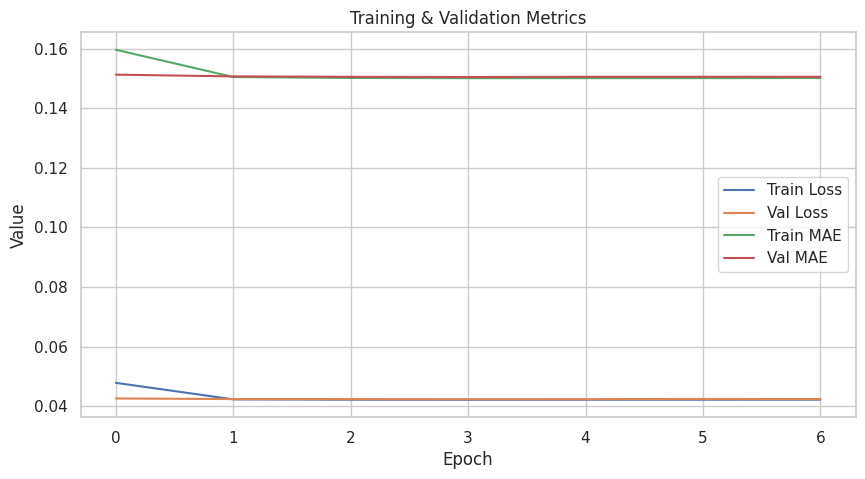

In [52]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training & Validation Metrics')
plt.show()

### Insight:

Grafik ini menunjukkan performa model selama pelatihan.

- Loss (Train & Validation): Keduanya menurun tajam di awal lalu mendatar. Ini menunjukkan model belajar dengan cepat dan kemudian konvergen. Val Loss sedikit lebih rendah dan lebih stabil daripada - Train Loss, yang jarang terjadi tetapi bisa mengindikasikan bahwa data validasi mungkin sedikit lebih "mudah" atau distribusi yang berbeda, atau regularization bekerja dengan sangat baik.
- MAE (Train & Validation): Mirip dengan loss, MAE juga menurun dan mendatar. Val MAE juga sedikit lebih rendah dari Train MAE.
- Tidak Ada Overfitting: Tidak ada tanda-tanda overfitting yang jelas karena Val Loss dan Val MAE tidak mulai meningkat setelah beberapa epoch. Model tampak stabil dan konvergen.
Secara singkat, model telah belajar dengan baik, mencapai konvergensi cepat, dan tidak menunjukkan overfitting yang signifikan.

## Evaluasi Collaborative Filtering

In [47]:
# Prediksi rating pada data validasi
y_pred_val = model.predict(x_val).flatten()

# Hitung MAE dan MSE
mae = mean_absolute_error(y_val, y_pred_val)
mse = mean_squared_error(y_val, y_pred_val)

print(f"MAE (Mean Absolute Error): {mae:.4f}")
print(f"MSE (Mean Squared Error): {mse:.4f}")

125002/125002 ━━━━━━━━━━━━━━━━━━━━ 151s 1ms/step
MAE (Mean Absolute Error): 0.1504
MSE (Mean Squared Error): 0.0388


### **Insight:**

Kode ini melakukan evaluasi akhir model rekomendasi pada data validasi.

1. Prediksi (y_pred_val = model.predict(x_val).flatten()): Model yang telah dilatih digunakan untuk membuat prediksi rating pada dataset validasi (x_val). .flatten() digunakan untuk mengubah output prediksi menjadi array 1D.

2. Perhitungan Metrik:
  - mae = mean_absolute_error(y_val, y_pred_val): Menghitung Mean Absolute Error (MAE) antara rating sebenarnya (y_val) dan rating prediksi (y_pred_val).
  - mse = mean_squared_error(y_val, y_pred_val): Menghitung Mean Squared Error (MSE).

3. Output Hasil:
  - 125002/125002: Menunjukkan bahwa model memproses 125.002 sampel dalam data validasi.
  - 155s 1ms/step: Proses prediksi membutuhkan waktu 155 detik (sekitar 2.5 menit) dengan rata-rata 1 milidetik per langkah/sampel.
  - MAE (Mean Absolute Error): 0.1504: Ini berarti rata-rata selisih absolut antara rating prediksi dan rating sebenarnya adalah 0.1504. Angka ini cukup rendah, menunjukkan bahwa prediksi model cukup dekat dengan rating sebenarnya.
  - MSE (Mean Squared Error): 0.0388: Ini adalah rata-rata kuadrat selisih. Nilai yang rendah ini juga mengindikasikan kinerja model yang baik dalam memprediksi rating.

Kesimpulan:

Model menunjukkan kinerja yang baik pada data validasi, dengan MAE sekitar 0.15 dan MSE sekitar 0.039. Angka-angka ini konsisten dengan metrik validasi yang terlihat pada plot pelatihan sebelumnya, menegaskan bahwa model telah belajar dengan efektif dan mampu membuat prediksi rating yang akurat pada data yang belum pernah dilihat sebelumnya.

# **Kesimpulan**

Berdasarkan isi notebook yang Anda lampirkan, berikut kesimpulan dan perbandingan antara **Collaborative Filtering (CF)** dan **Content-Based Filtering (CBF)** berdasarkan hasil evaluasi:

---

### **Kesimpulan Model Terbaik**

**Collaborative Filtering (CF)** terbukti sebagai model terbaik **dalam hal akurasi prediksi rating**. Ini dibuktikan dari metrik evaluasi berikut:

* **Mean Absolute Error (MAE): 0.1504**
* **Mean Squared Error (MSE): 0.0388**

Sementara **Content-Based Filtering (CBF)** dievaluasi menggunakan **Precision\@10**, dengan hasil yang **lebih bervariasi** dan **lebih rendah** (antara 0.1 – 0.3 tergantung pengguna), menandakan performa yang **kurang stabil** dan **kurang akurat** dalam memberikan rekomendasi personal yang tepat.

---

### **Perbandingan CF vs CBF**

| Aspek          | Collaborative Filtering                                                                                                                              | Content-Based Filtering                                                                                                                                  |
| -------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Kelebihan**  | - Akurat jika data rating cukup banyak<br>- Menangkap pola preferensi pengguna kompleks<br>- Tidak butuh informasi konten item                       | - Bisa merekomendasikan item baru (cold-start item)<br>- Tidak terpengaruh oleh popularitas pengguna lain<br>- Personal dan berbasis minat pengguna      |
| **Kekurangan** | - Tidak bekerja baik pada data yang jarang (sparse)<br>- Tidak bisa merekomendasikan item baru (cold-start problem)<br>- Perlu banyak data interaksi | - Kualitas tergantung fitur konten yang tersedia<br>- Kurang mampu menangkap pola perilaku pengguna<br>- Cenderung over-specialized (rekomendasi sempit) |

---

### Rangkuman

* Jika **data rating cukup banyak dan variatif**, **CF adalah pilihan terbaik** karena memberikan hasil prediksi yang lebih akurat dan konsisten.
* Namun, untuk skenario **item baru atau pengguna baru**, **CBF tetap penting** sebagai pelengkap.
* Pendekatan **Hybrid Filtering** (menggabungkan CF dan CBF) bisa menjadi solusi paling optimal untuk mengatasi kelemahan masing-masing pendekatan.
